## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from mlxtend.classifier import StackingCVClassifier

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


1. age: (int) - Age in years
2. sex: (int) - (1 = Male, 0 = Female)
3. cp: (int) - Chest pain type
4. trestbps: (int) - Resting Blood Pressure (in mm Hg on Admission to the Hospital)
5. chol: (int) - Serum cholestoral in mg/dl
6. fbs: (int) - Fasting blood sugar >120 mg/dl (1 = True, 0 = False)
7. restecg: (int) - Resting electrocardiographic results
8. thalach: (int) - Maximum heart rate achieved
9. exang: (int) - Exercise induced angina (1 = yes, 0 = no)
10. oldpeak: (float) - ST depression induced by exercise relative to rest
11. slope: (int) - The slope of the peak exercise ST segment
12. ca: (int) - Number of major vessels (0-3) colored by flourosopy
13. thal: (int) - A blood disorder called thalassemia (3 = Normal, 6 = Fixed Defect, 7 = Reversable Defect)
14. target (0 = false(no disease), 1 = true(disease))

In [5]:
data.shape

(1025, 14)

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Statistics of Categorical and Numerical Data

In [9]:
# Stats of numerical data
round(data.describe(exclude='object'))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,149.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,1.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [10]:
# --- Fix Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data[lst] = data[lst].astype(object)

In [11]:
# Description of data object columns
data.select_dtypes(include=['object']).describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,1,0,2
freq,713,497,872,513,680,482,578,544


In [12]:
# Description of percent of data object columns
col=data.select_dtypes(include=['object']).columns.tolist()

# Create iteration of object columns
for i in col:
  count=data.groupby(['target'])[i].value_counts()[1]
  percent=data.groupby(['target'])[i].value_counts(normalize=True)[1]
  display(pd.DataFrame({"Patients":count, "Percent":percent*100})\
            .sort_values("Percent", ascending=False)
            .style.set_caption('Variable: {}'.format(i))\
            .format({"Percent": "{:,.1f}%"})
            .highlight_max(props='font-weight:bold; color:Black', axis=0)) 

,Patients,Percent
sex,,
1,300,57.0%
0,226,43.0%


,Patients,Percent
cp,,
2,219,41.6%
1,134,25.5%
0,122,23.2%
3,51,9.7%


,Patients,Percent
fbs,,
0,455,86.5%
1,71,13.5%


,Patients,Percent
restecg,,
1,309,58.7%
0,214,40.7%
2,3,0.6%


,Patients,Percent
exang,,
0,455,86.5%
1,71,13.5%


,Patients,Percent
slope,,
2,340,64.6%
1,158,30.0%
0,28,5.3%


,Patients,Percent
ca,,
0,415,78.9%
1,66,12.5%
2,21,4.0%
4,15,2.9%
3,9,1.7%


,Patients,Percent
thal,,
2,412,78.3%
3,90,17.1%
1,21,4.0%
0,3,0.6%


## Exploratory Data Analysis

## Age(“age”) Analysis
Here we will be checking the 10 ages and their counts.

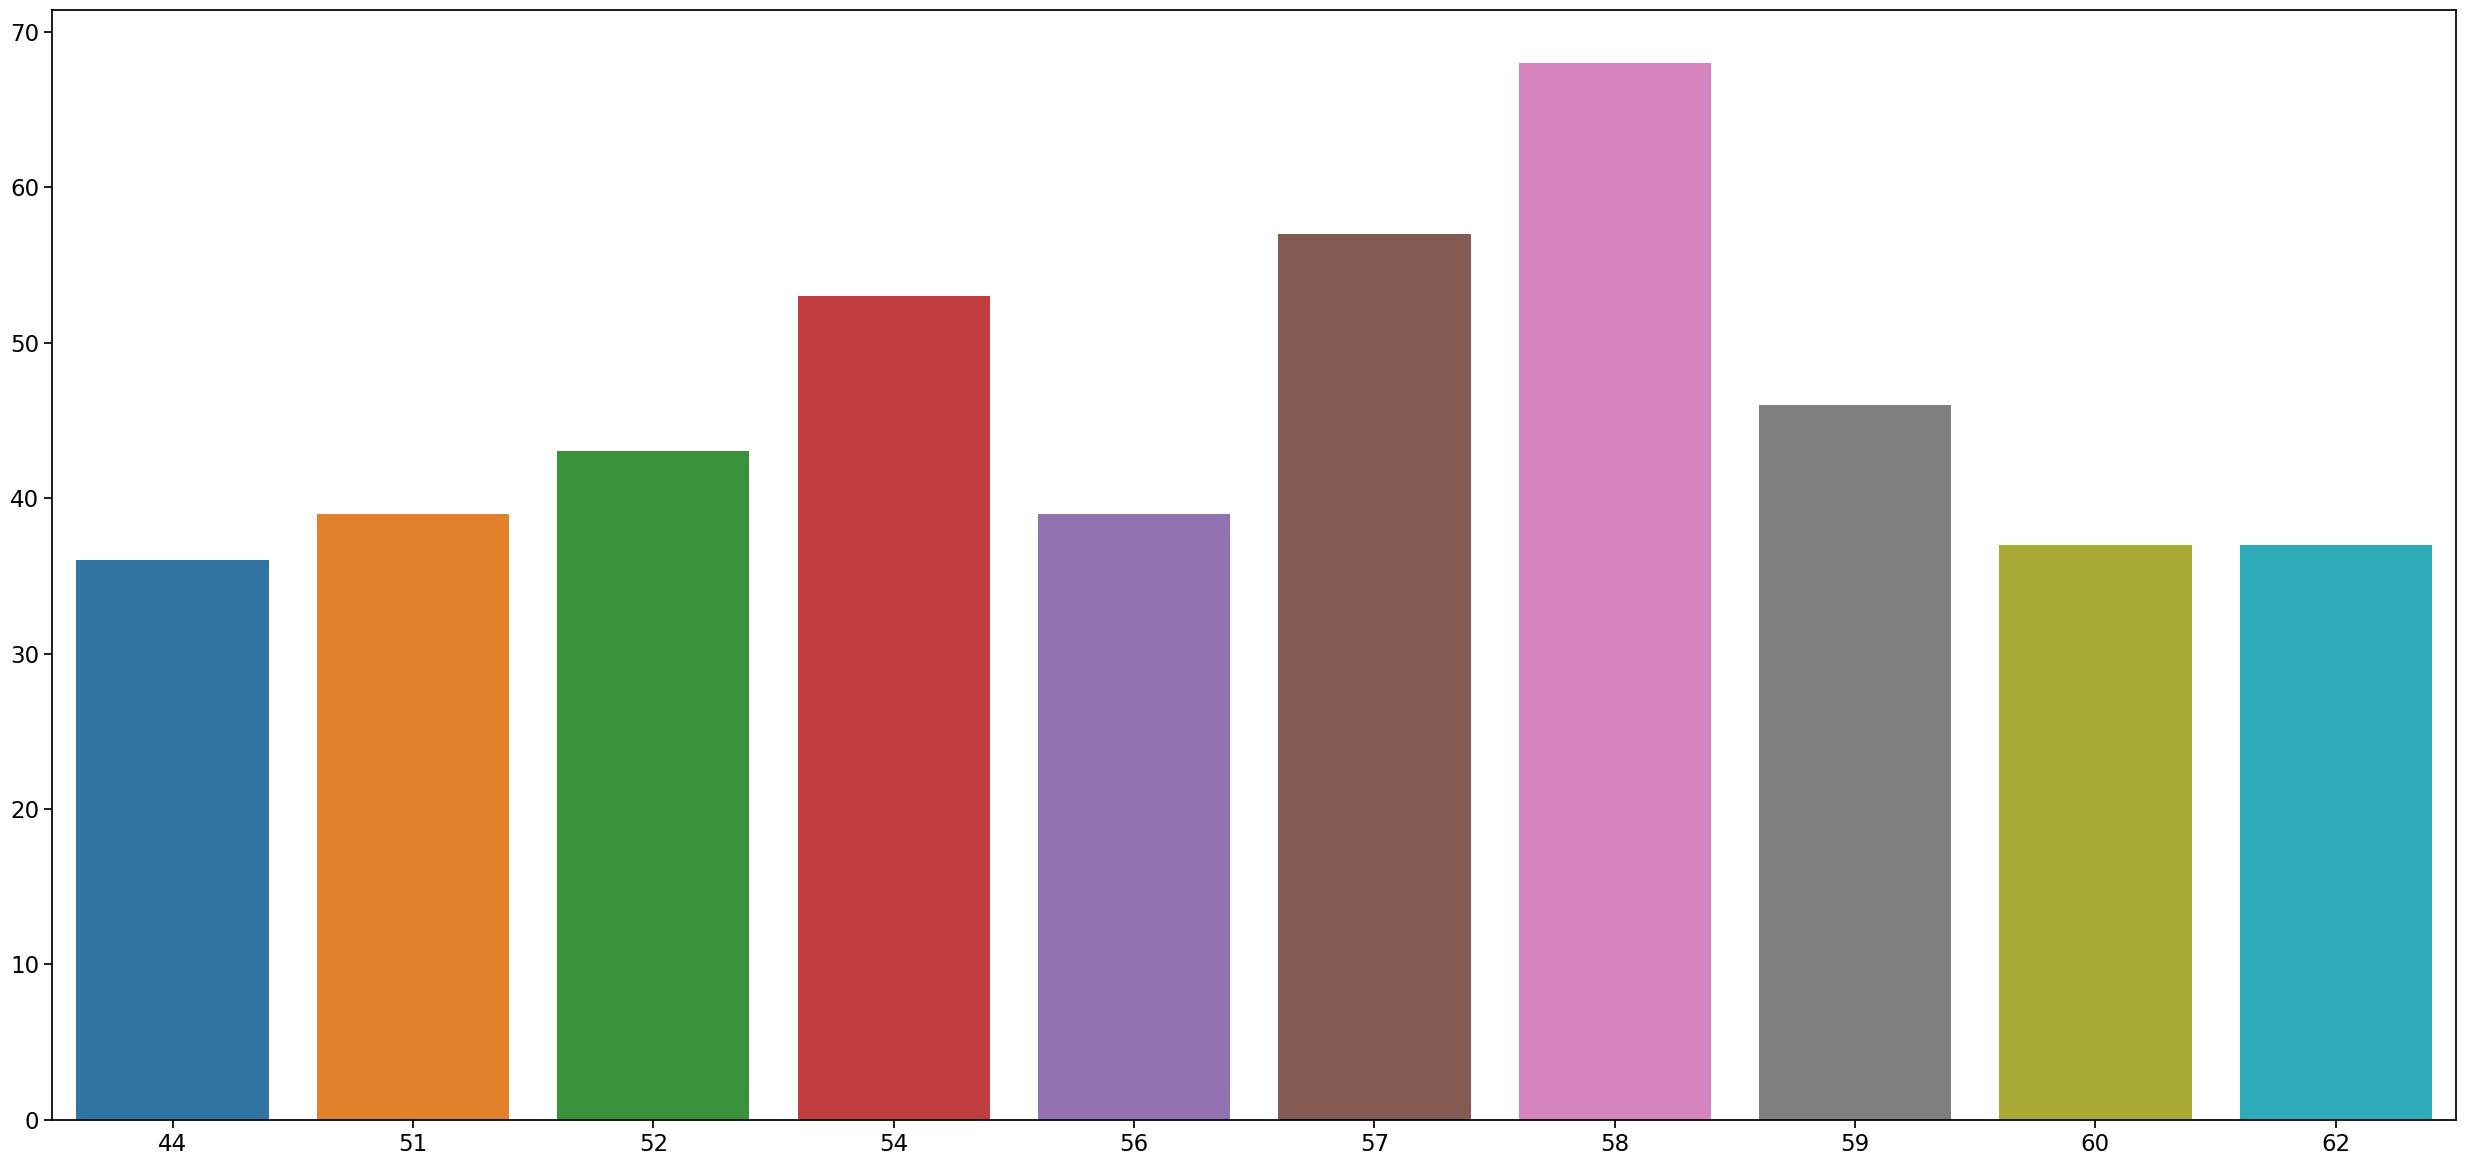

In [13]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

Here we can see that the 58 age column has the highest frequency.

#### **Let’s check the range of age in the dataset.**

In [14]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43414634146342


**We should divide the Age feature into three parts – “Young”, “Middle” and “Elder”**

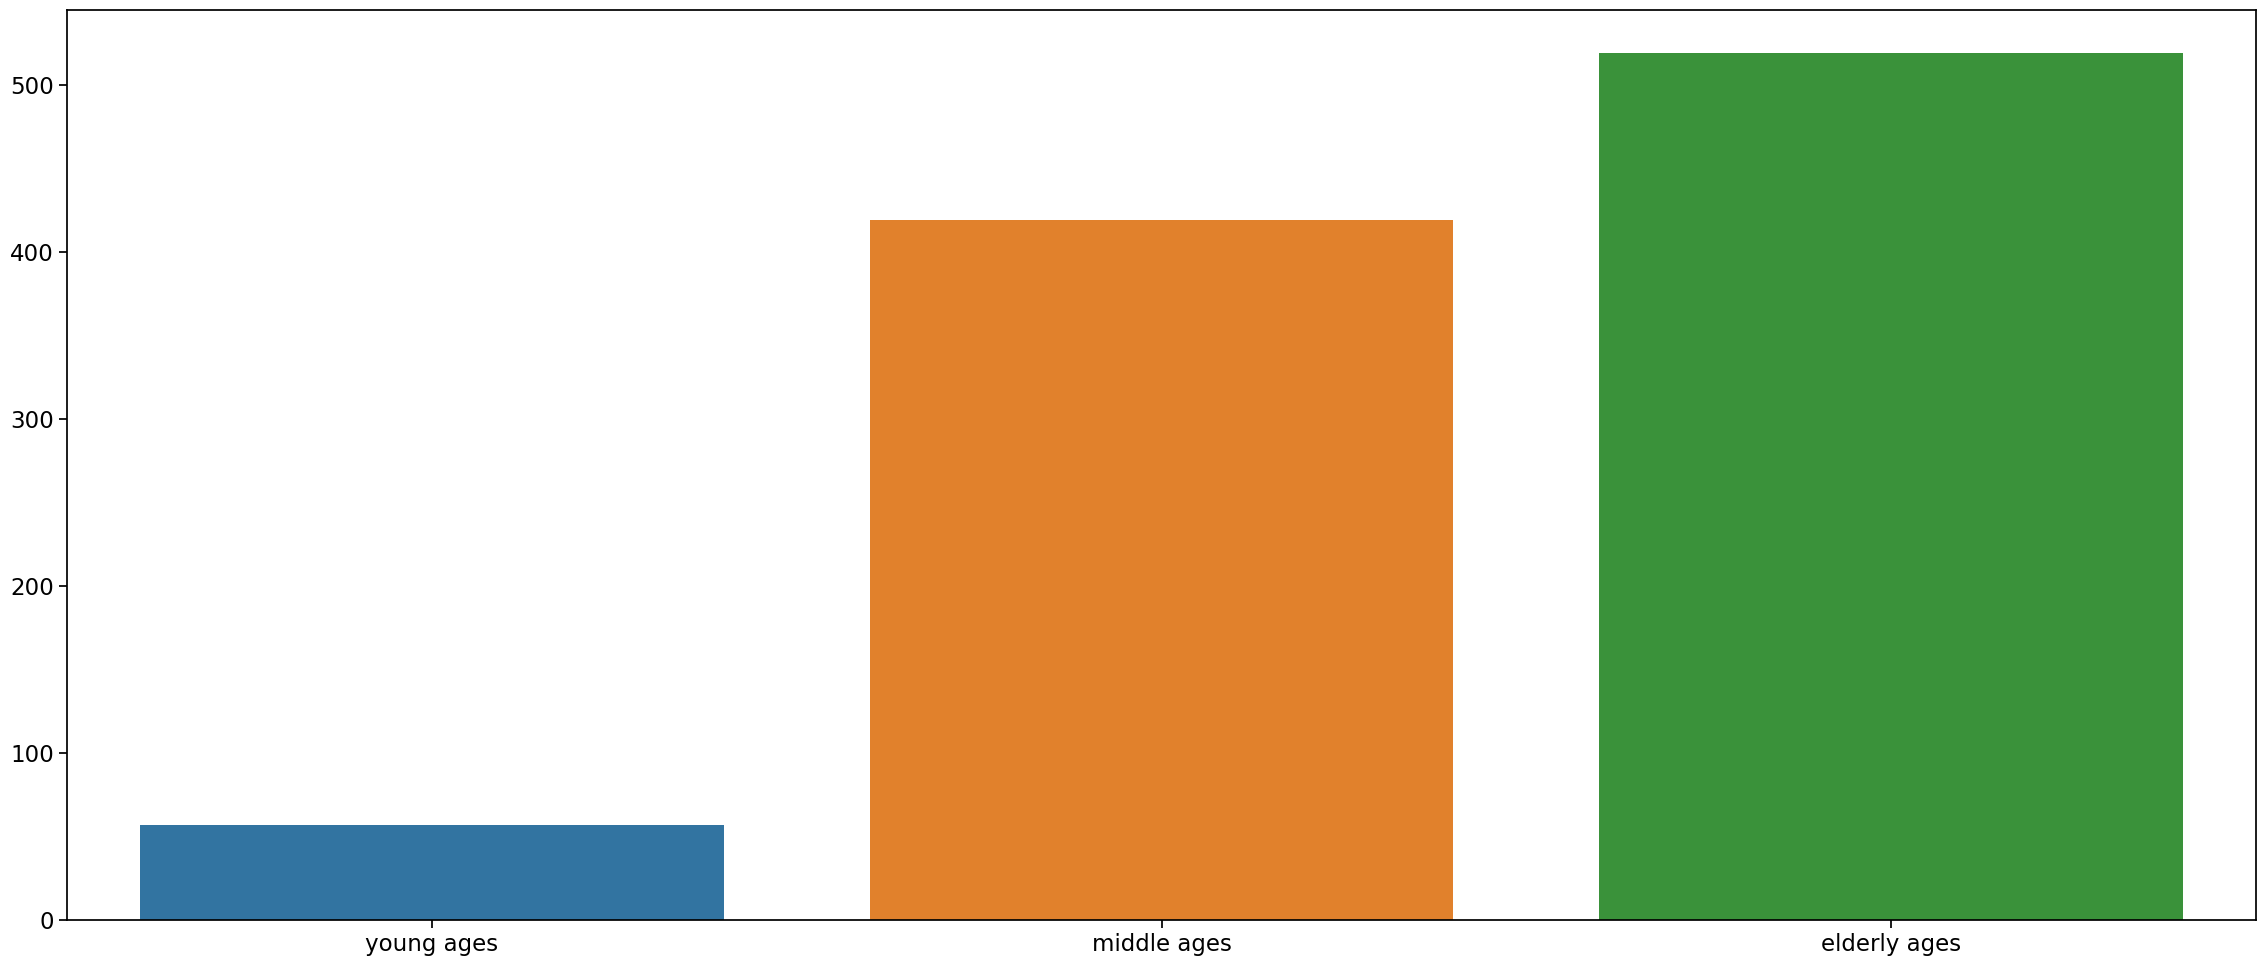

In [15]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**Here we can see that elder people are the most affected by heart disease and young ones are the least affected.**

>To prove the above inference we will plot the pie chart.



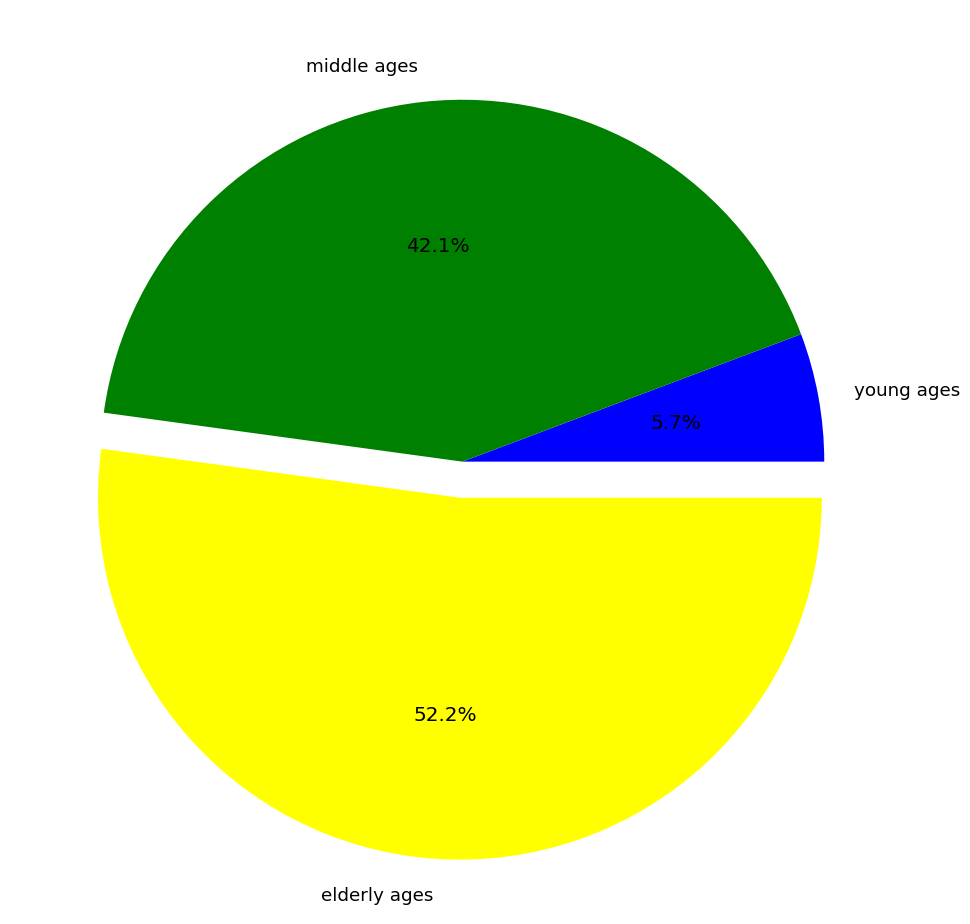

In [16]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

## Pie chart and Histogram Comparison

### Pie Chart and Histogram ON **Gender(Sex)**

_________________________
 Sex (Gender) Total 
_________________________


1    713
0    312
Name: sex, dtype: int64

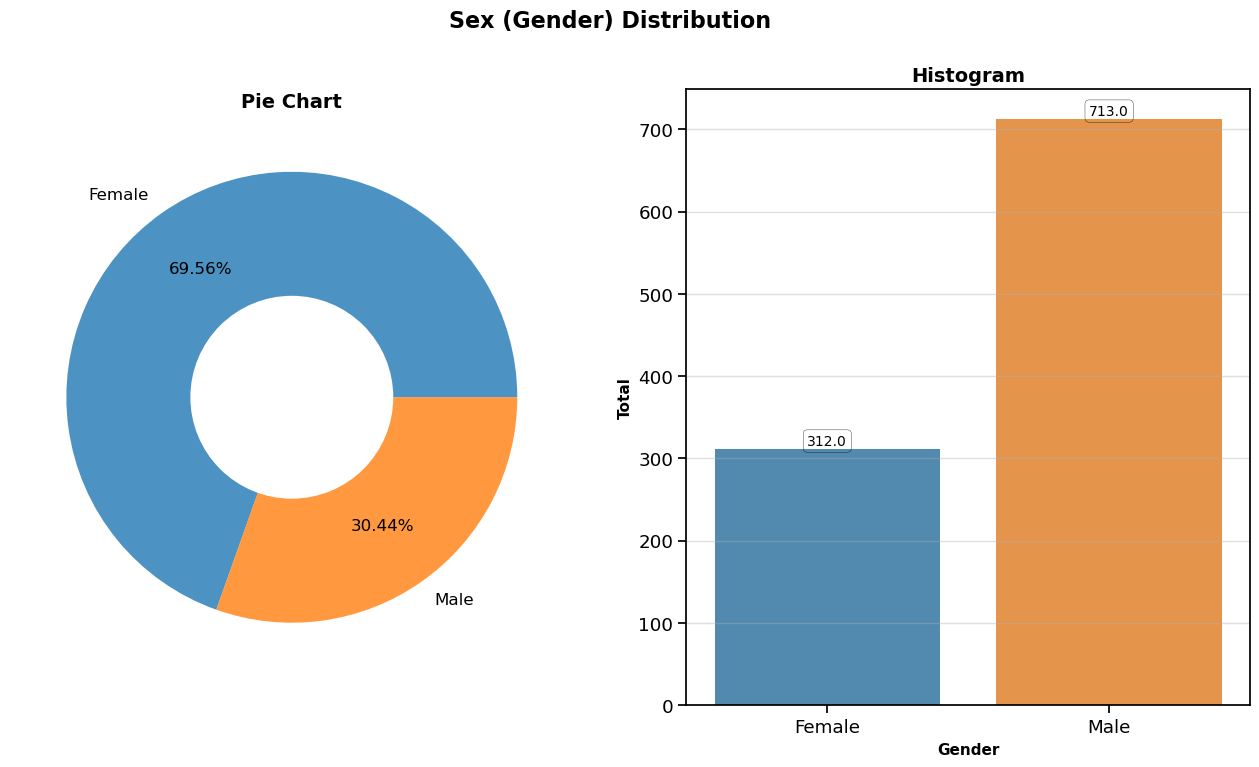

In [17]:
labels=['Female', 'Male']
order=data['sex'].value_counts().index

plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', fontsize='16')


plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14)
plt.pie(data['sex'].value_counts(), labels=labels,pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14)
ax = sns.countplot(x='sex', data=data,alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none',linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels without Dropping Null Walues ---
print('_' * 25)
print('\033[1m'+' Sex (Gender) Total '+'\033[0m')
print('_' * 25)
data.sex.value_counts(dropna=False)

### Pie Chart and Histogram on **cp (Chest Pain Type)**

******************************
 Chest Pain Type 
______________________________


0    497
2    284
1    167
3     77
Name: cp, dtype: int64

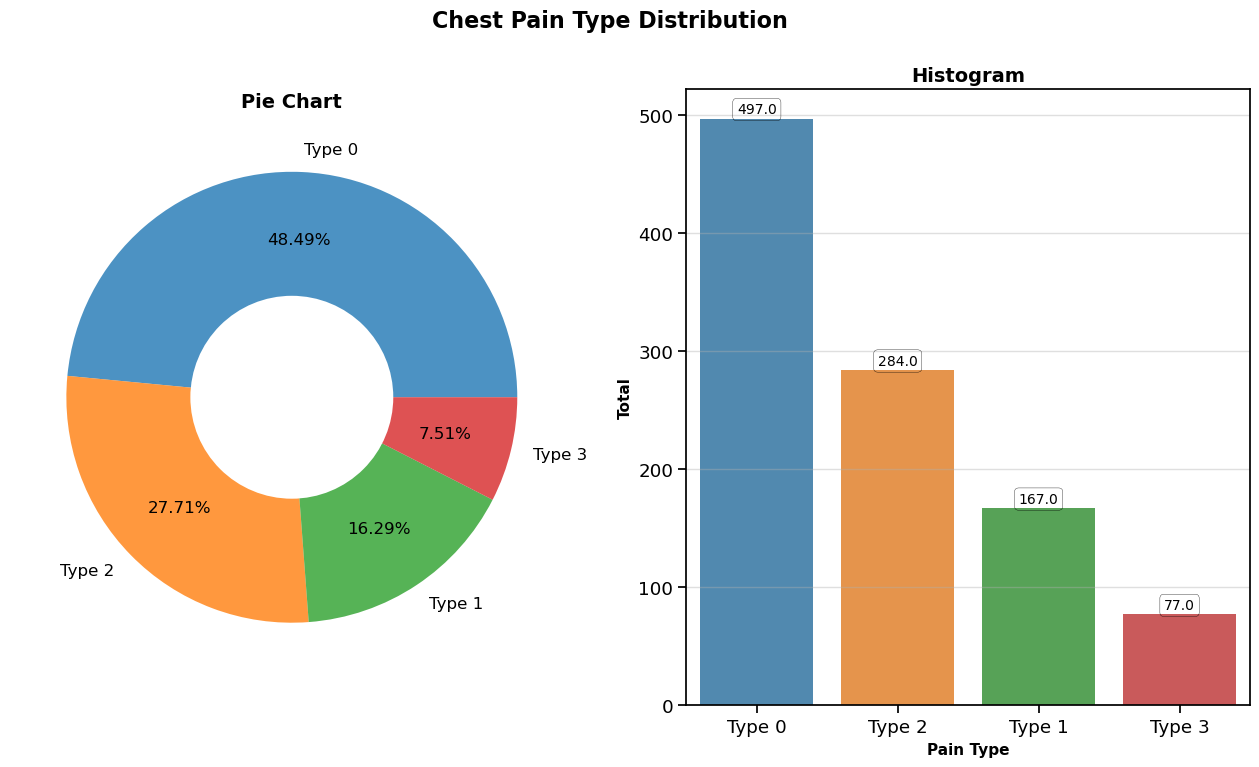

In [18]:
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=data['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16,fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif')
plt.pie(data['cp'].value_counts(), labels=labels,pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='cp', data=data,order=order,alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels without Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+' Chest Pain Type '+'\033[0m')
print('_' * 30)
data.cp.value_counts(dropna=False)

### Pie Chart and Histogram on **fbs (Fasting Blood Sugar)**

________________________________
.: Fasting Blood Sugar Total :.
________________________________


0    872
1    153
Name: fbs, dtype: int64

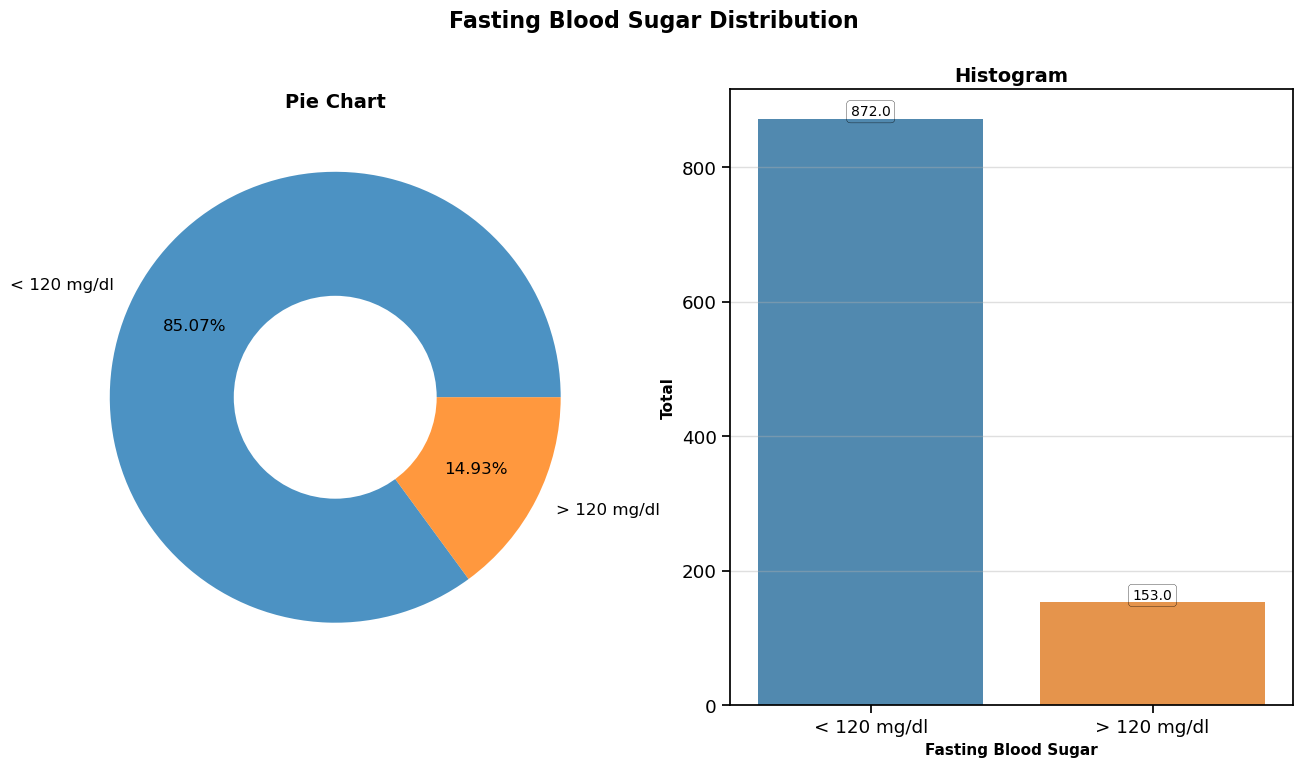

In [19]:
labels=['< 120 mg/dl', '> 120 mg/dl']
order=data['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy',fontsize=16)

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['fbs'].value_counts(), labels=labels,wedgeprops=dict(alpha=0.8), autopct='%.2f%%',pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='fbs', data=data,order=order,alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',linewidth=0.25,boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


# --- Count Categorical Labels w/out Dropping Null Walues ---
print('_' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('_' * 32)
data.fbs.value_counts(dropna=False)

### Pie Chart and Histogram on **restecg (Resting Electrocardiographic Results)**

__________________________________________________
 Resting Electrocardiographic Results 
__________________________________________________


1    513
0    497
2     15
Name: restecg, dtype: int64

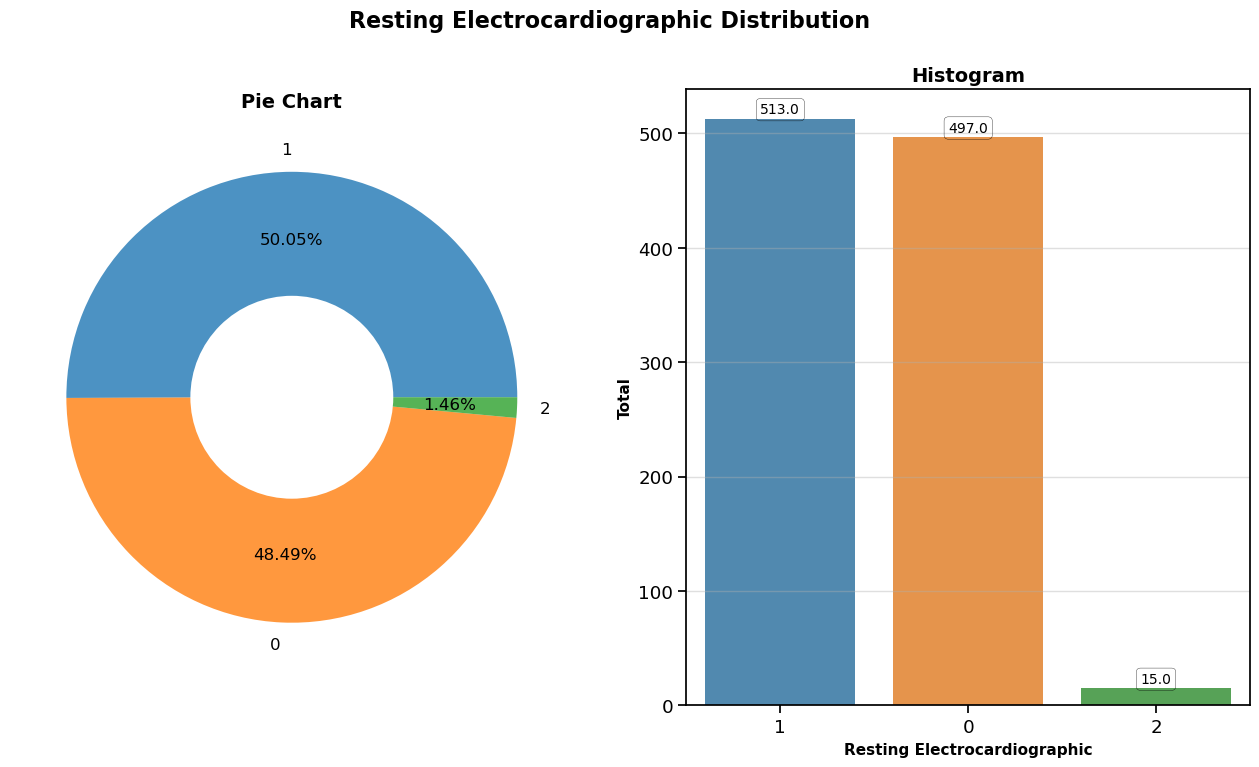

In [20]:
labels=['1', '0', '2']
order=data['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['restecg'].value_counts(), labels=labels, wedgeprops=dict(alpha=0.8), autopct='%.2f%%',pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='restecg', data=data,order=order,alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('_' * 50)
print('\033[1m'+' Resting Electrocardiographic Results '+'\033[0m')
print('_' * 50)
data.restecg.value_counts(dropna=False)

### Pie Chart and Histogram on **exang (Exercise Induced Angina)**

___________________________________
 Exercise Induced Angina Total 
___________________________________


0    680
1    345
Name: exang, dtype: int64

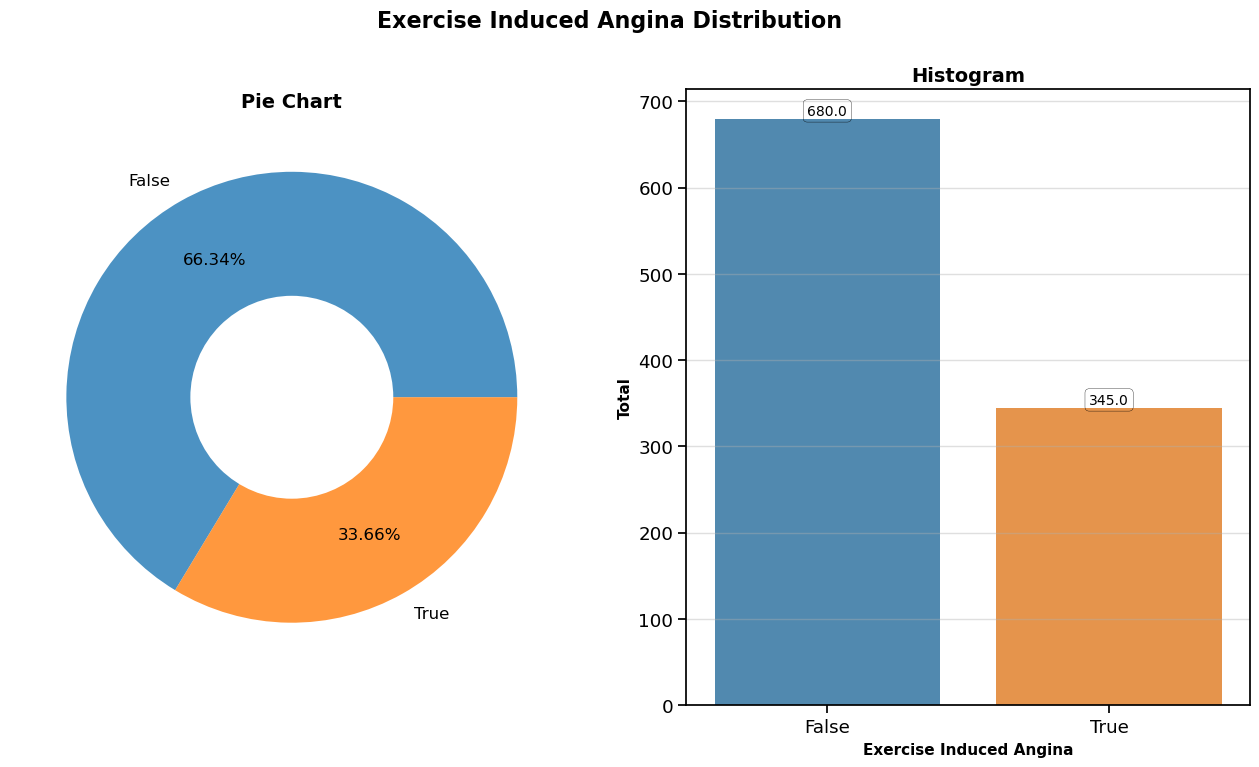

In [21]:
labels=['False', 'True']
order=data['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['exang'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='exang', data=data,order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('_' * 35)
print('\033[1m'+' Exercise Induced Angina Total '+'\033[0m')
print('_' * 35)
data.exang.value_counts(dropna=False)

### Pie Chart and Histogram on **slope (Slope of the Peak Exercise)**

_______________
 Slope Total 
_______________


1    482
2    469
0     74
Name: slope, dtype: int64

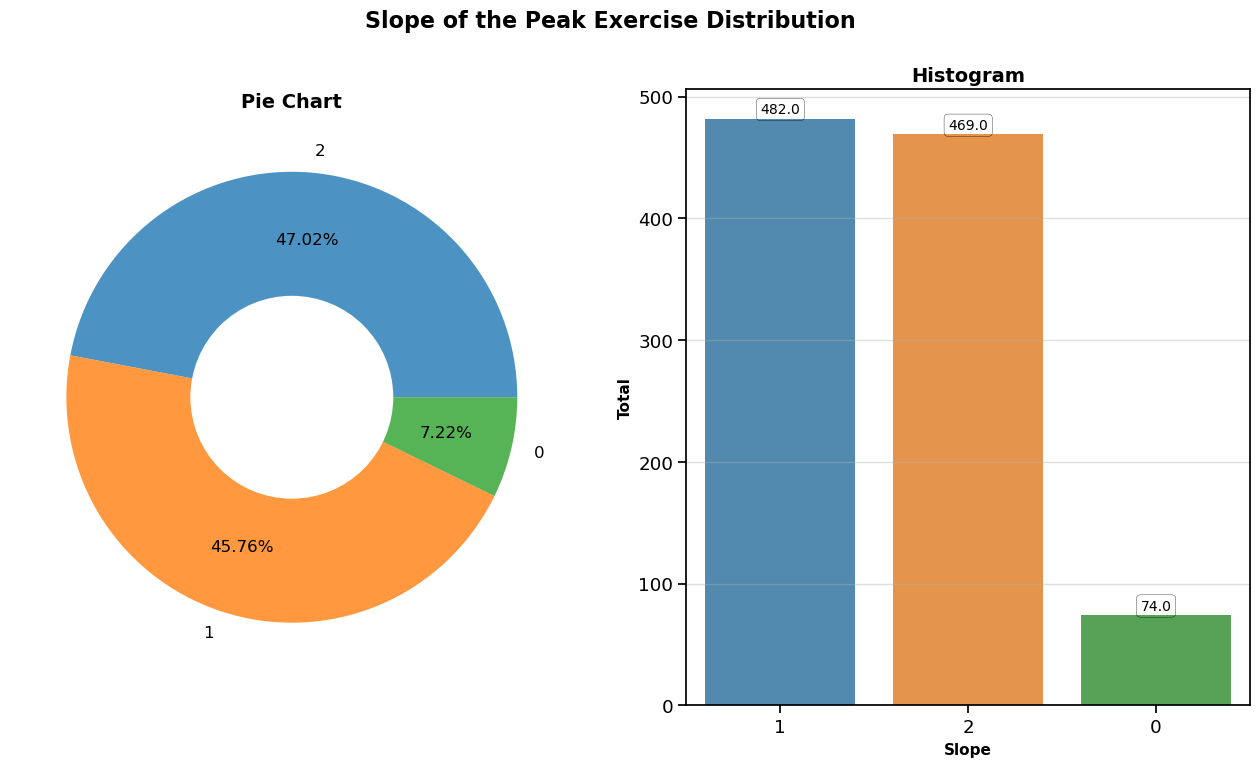

In [22]:
labels=['2', '1', '0']
order=data['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
plt.pie(data['slope'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='slope', data=data,order=order,alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',linewidth=0.25,boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('_' * 15)
print('\033[1m'+' Slope Total '+'\033[0m')
print('_' * 15)
data.slope.value_counts(dropna=False)

### Pie Chart and Histogram on  **ca (Number of Major Vessels)**

___________________________________
 Number of Major Vessels Total 
___________________________________


0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

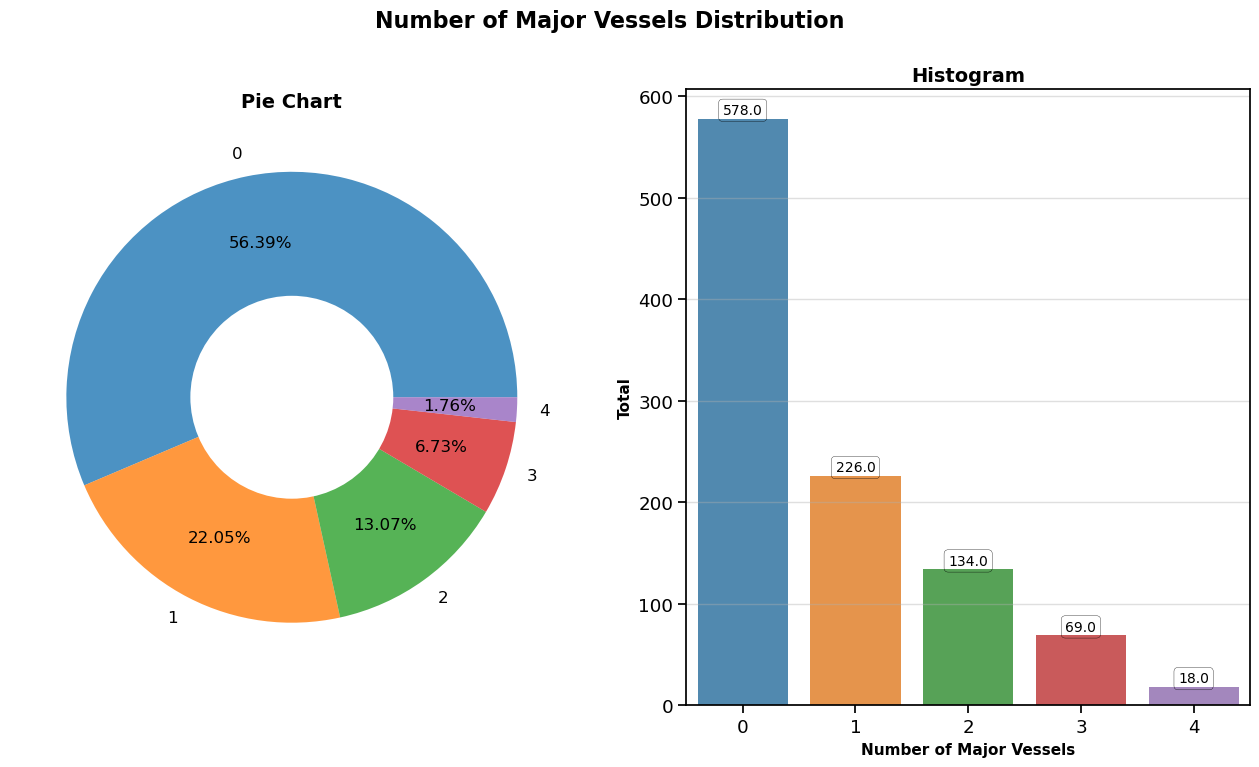

In [23]:
labels=['0', '1', '2', '3', '4']
order=data['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['ca'].value_counts(), labels=labels,
        wedgeprops=dict(alpha=0.8), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='ca', data=data,order=order,
                   alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('_' * 35)
print('\033[1m'+' Number of Major Vessels Total '+'\033[0m')
print('_' * 35)
data.ca.value_counts(dropna=False)

### Pie Chart and Histogram on **thal(thalium stress result)**

___________________________________
 thal (thalium stress result) Total 
___________________________________


2    544
3    410
1     64
0      7
Name: thal, dtype: int64

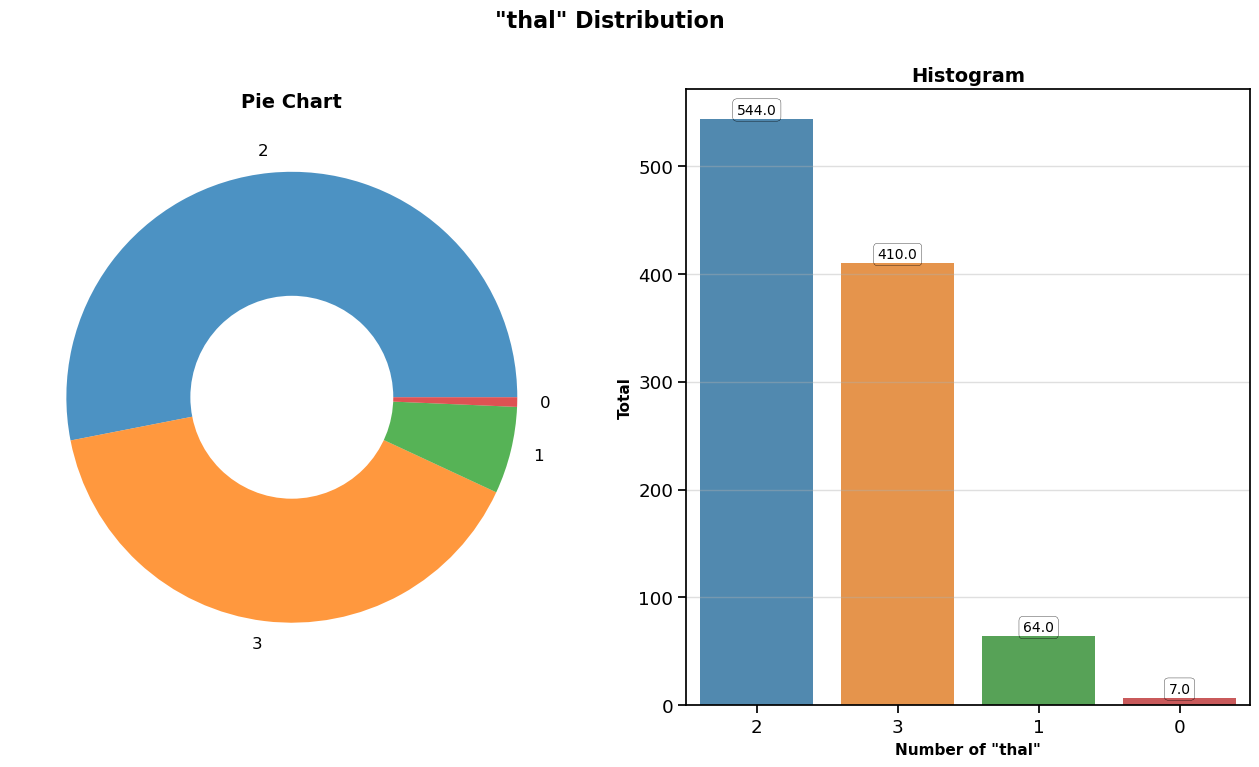

In [24]:
labels=['2', '3', '1', '0']
order=data['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16,fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['thal'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8), pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='thal', data=data, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('_' * 35)
print('\033[1m'+' thal (thalium stress result) Total '+'\033[0m')
print('_' * 35)
data.thal.value_counts(dropna=False)

### Pie Chart and Histogram on **target (Heart Diseases Status)**

________________________________________
 Heart Diseases Status (target) Total 
________________________________________


1    526
0    499
Name: target, dtype: int64

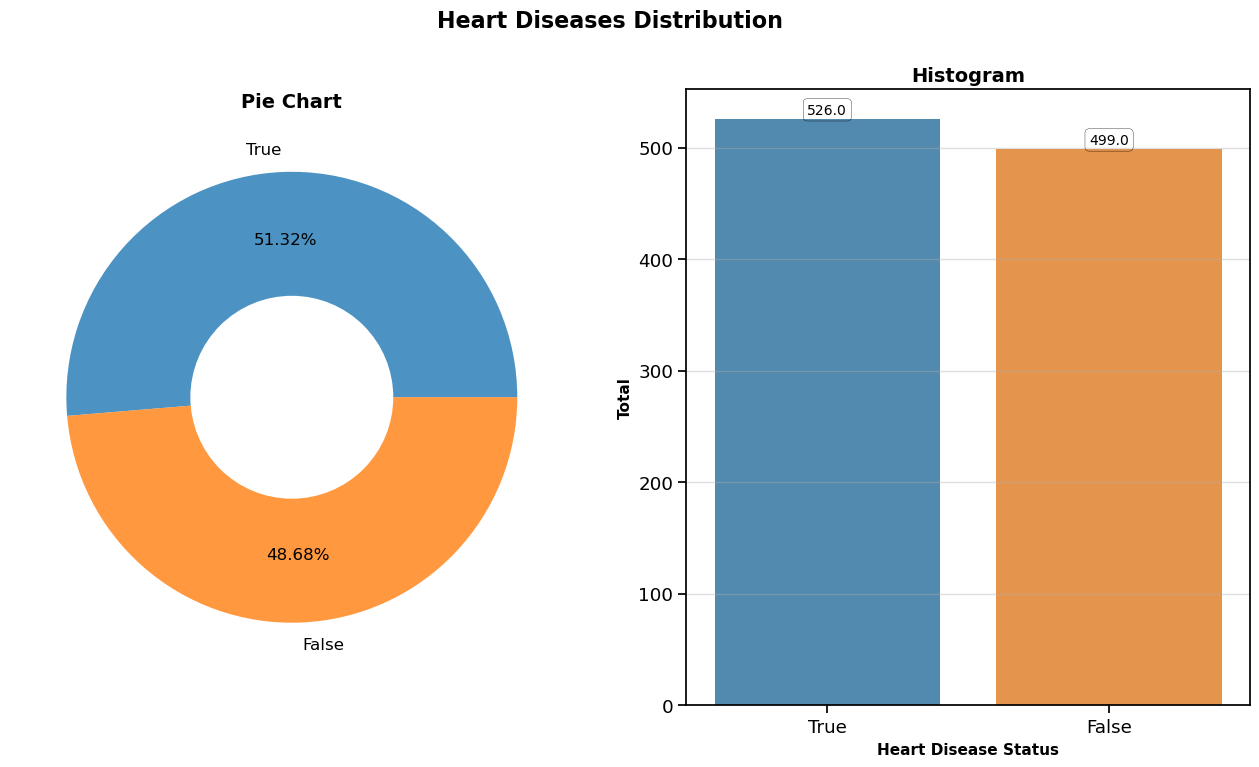

In [25]:
labels=['True', 'False']
order=data['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(data['target'].value_counts(), labels=labels, 
        wedgeprops=dict(alpha=0.8), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='target', data=data, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('_' * 40)
print('\033[1m'+' Heart Diseases Status (target) Total '+'\033[0m')
print('_' * 40)
data.target.value_counts(dropna=False)

### Heart Disease Distribution based on Gender(sex)

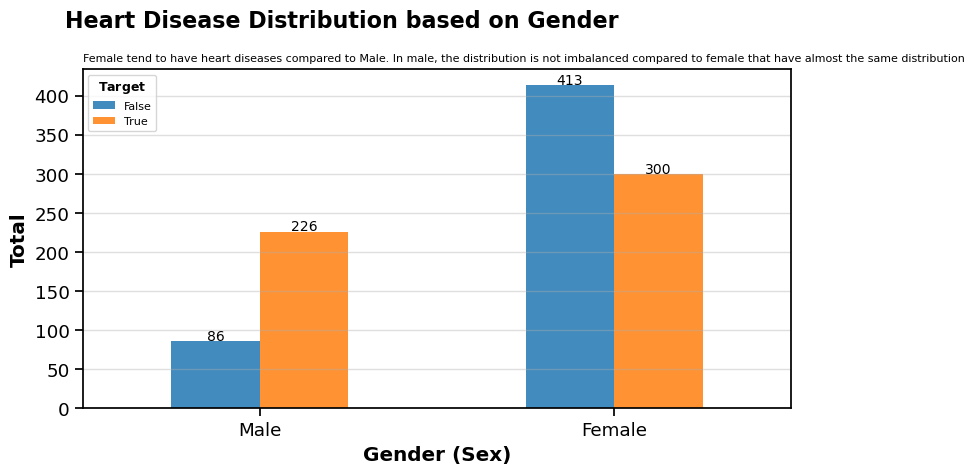

In [26]:
# Labels
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# Creating Bar Chart
ax = pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(8, 5), alpha=0.85)
# Bar Chart Settings 
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female that have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', title_fontsize='9', loc='upper left', frameon=True);

### Pairplot of data

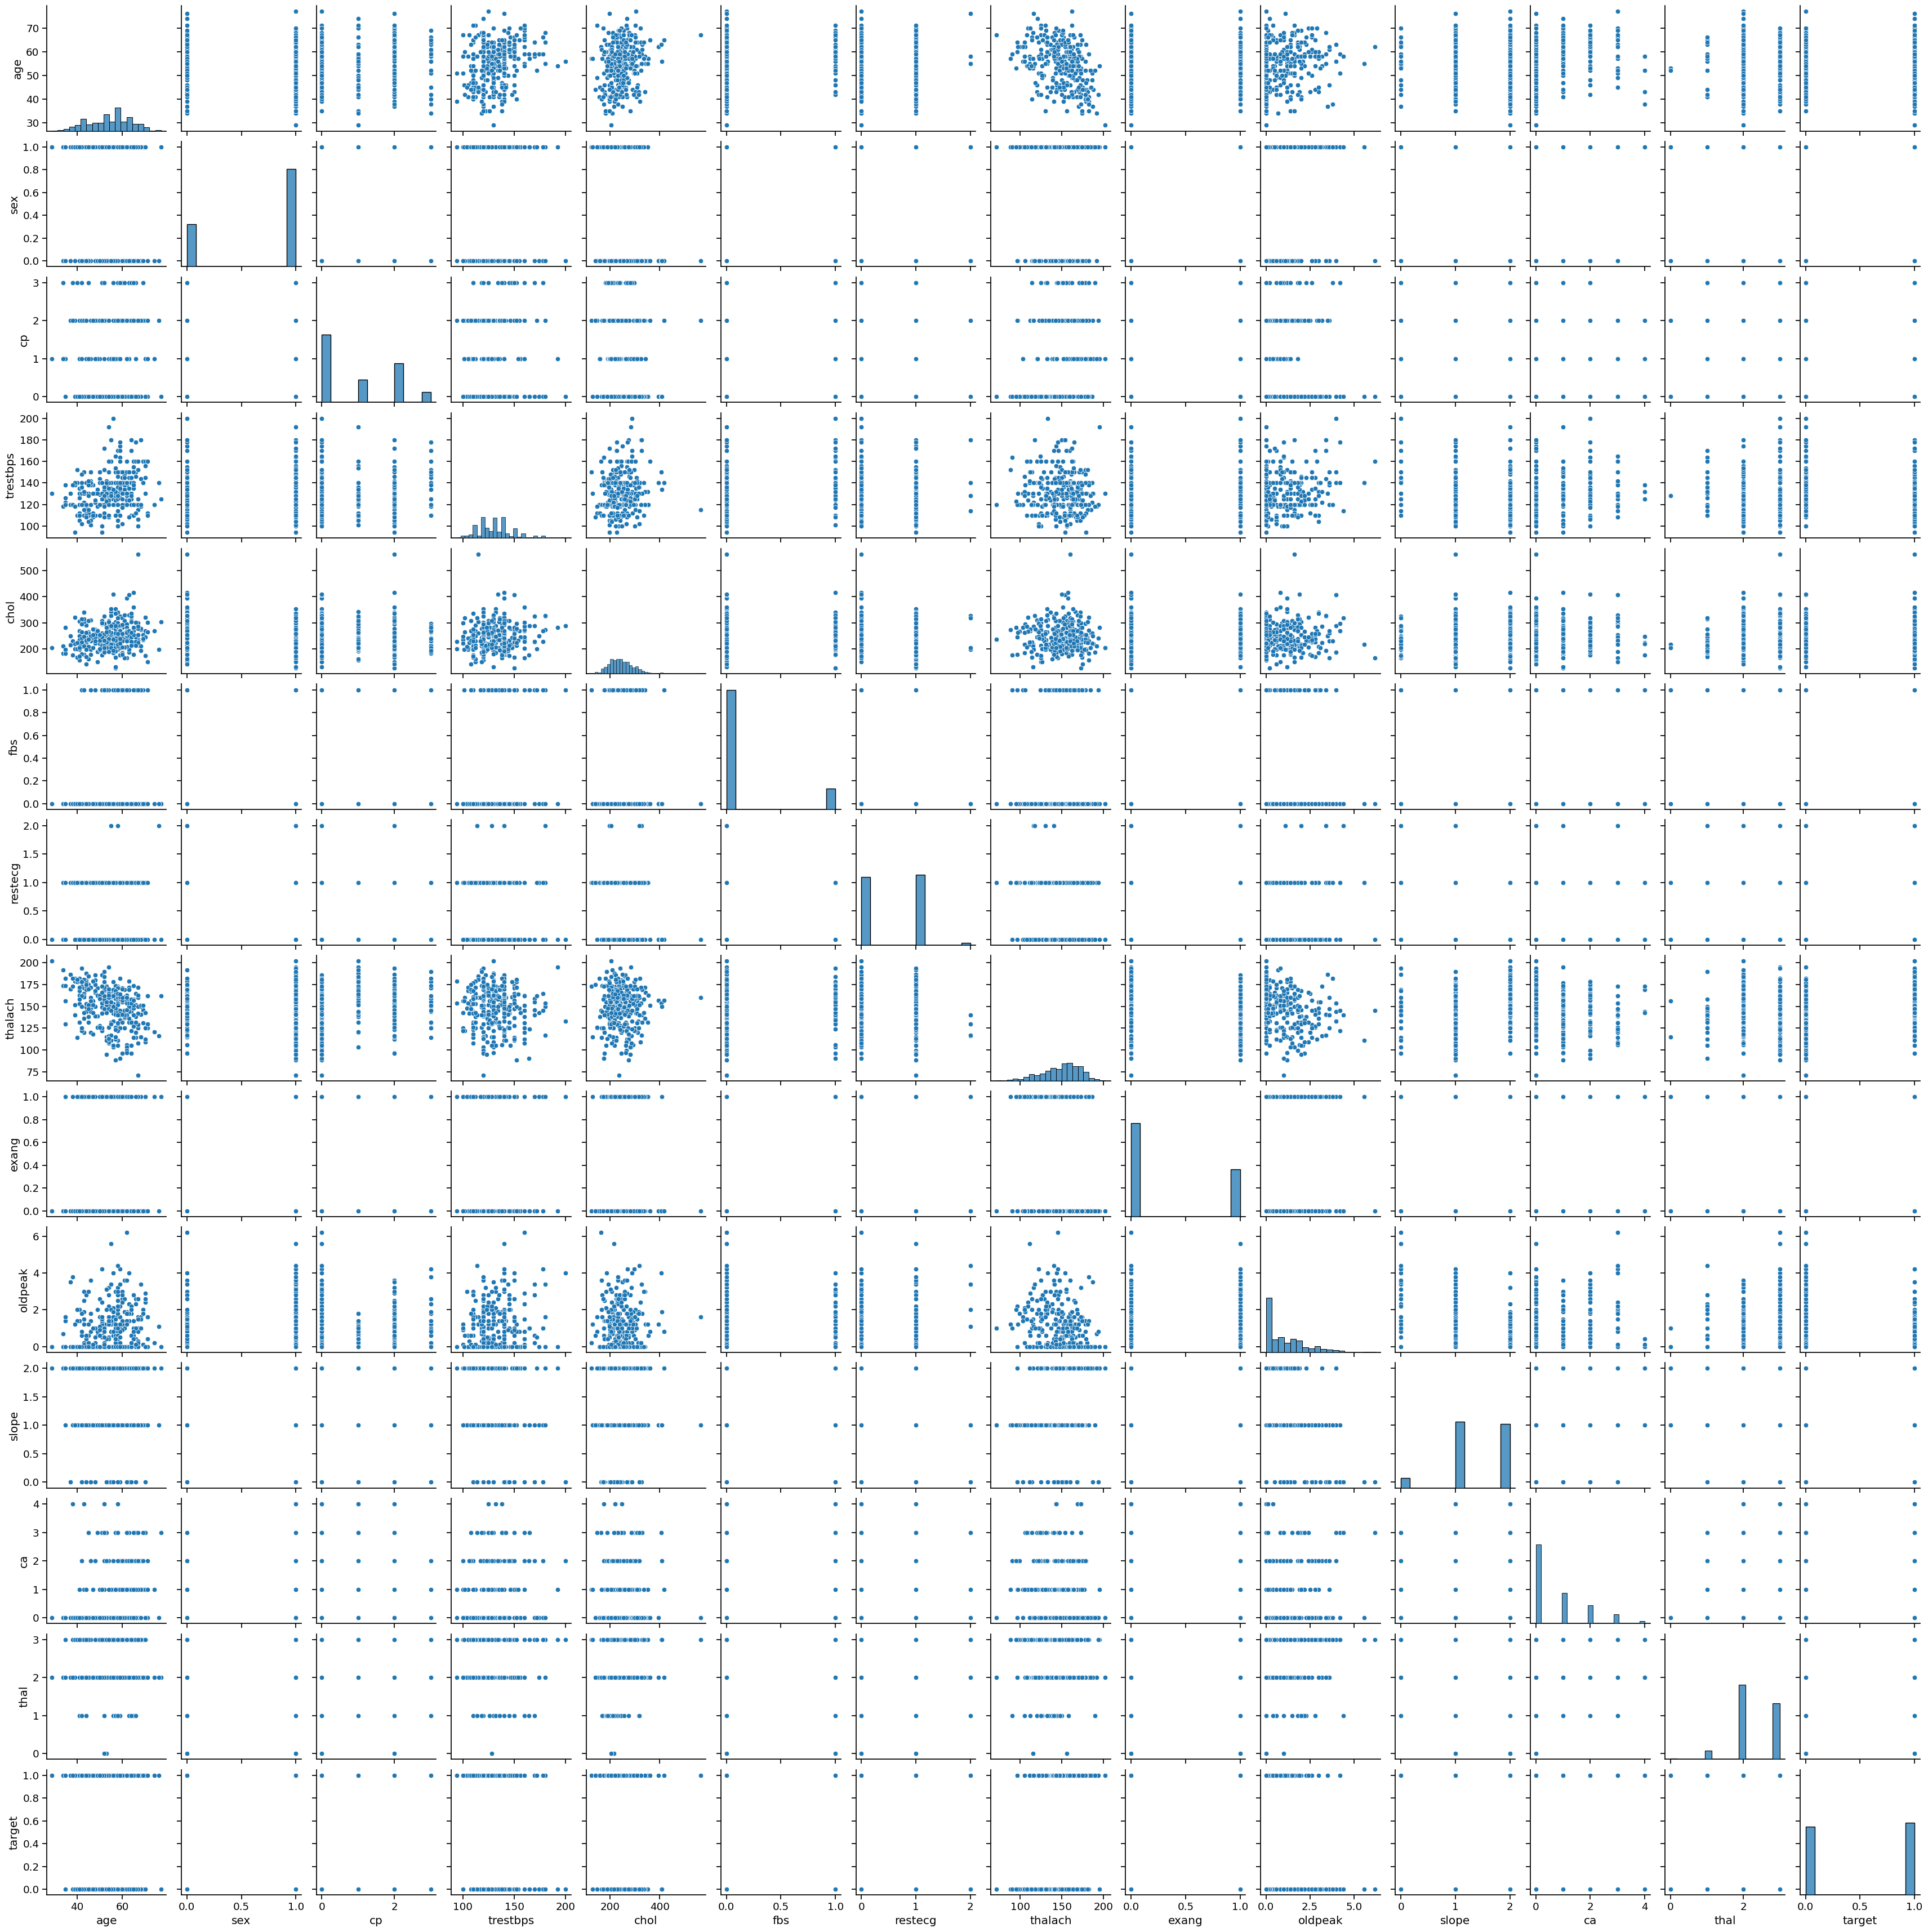

In [27]:
sns.pairplot(data=data)

## Numerical Variable

### Descriptive Statistics

In [28]:
data.select_dtypes(exclude='object').describe()

,age,trestbps,chol,thalach,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


### Continuous Column Distribution 

In this section will show the distribution of numerical variables in histograms, boxplots, Q-Q Plots, skewness and kurtosis values.

### Column Distribution on Age

 Age Column Skewness & Kurtosis 
___________________________________
Skewness: -0.249
Kurtosis: -0.526




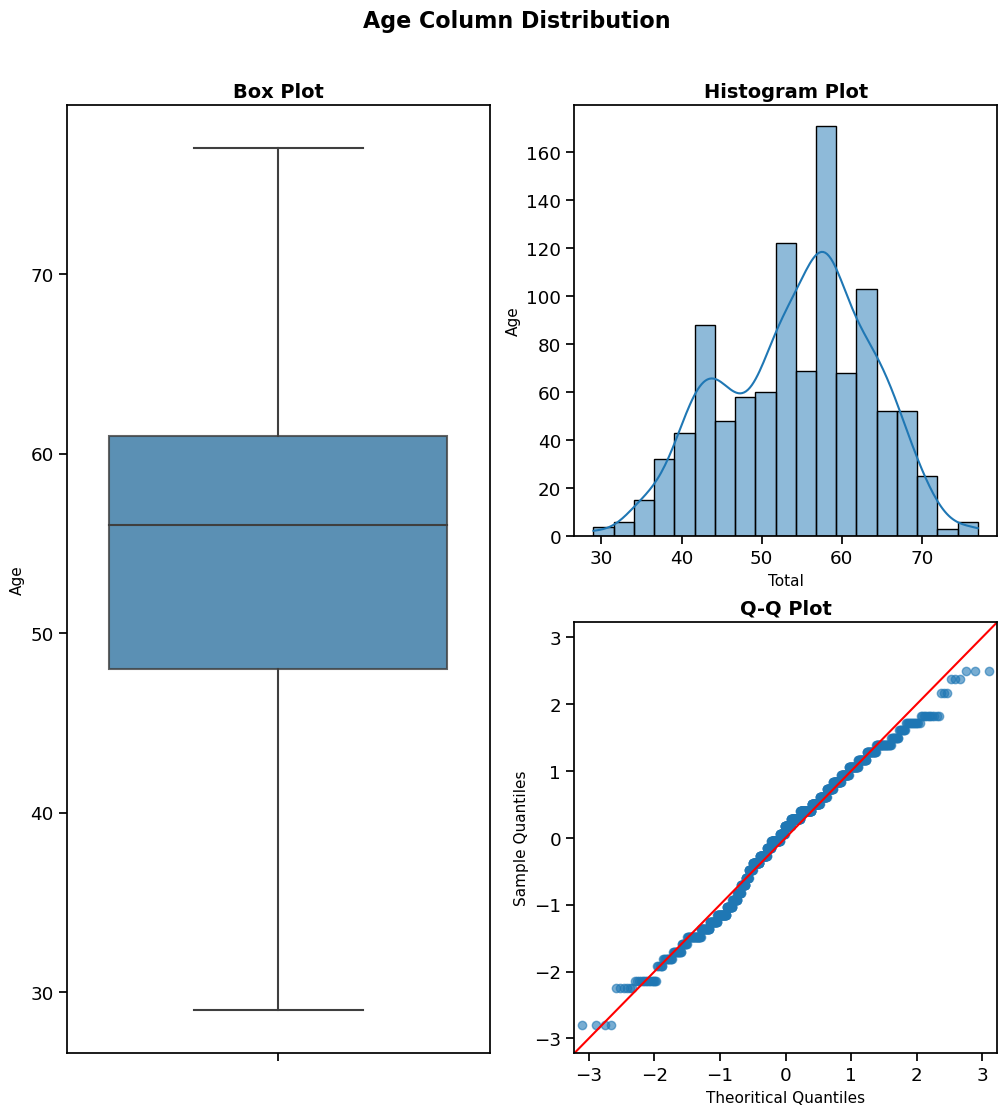

In [29]:
var = 'age'
fig=plt.figure(figsize=(12, 12))

# Skewness & Kurtosis 
print('\033[1m'+' Age Column Skewness & Kurtosis '+'\033[0m')
print('_' * 35)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=data, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Q-Q Plot
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
qqplot(data[var], fit=True, line='45', ax=ax_2,alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=data, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

### Column Distribution on trestbps (Resting Blood Pressure)

  Resting Blood Pressure Column Skewness & Kurtosis 
_______________________________________________________
Skewness: 0.740
Kurtosis: 0.991




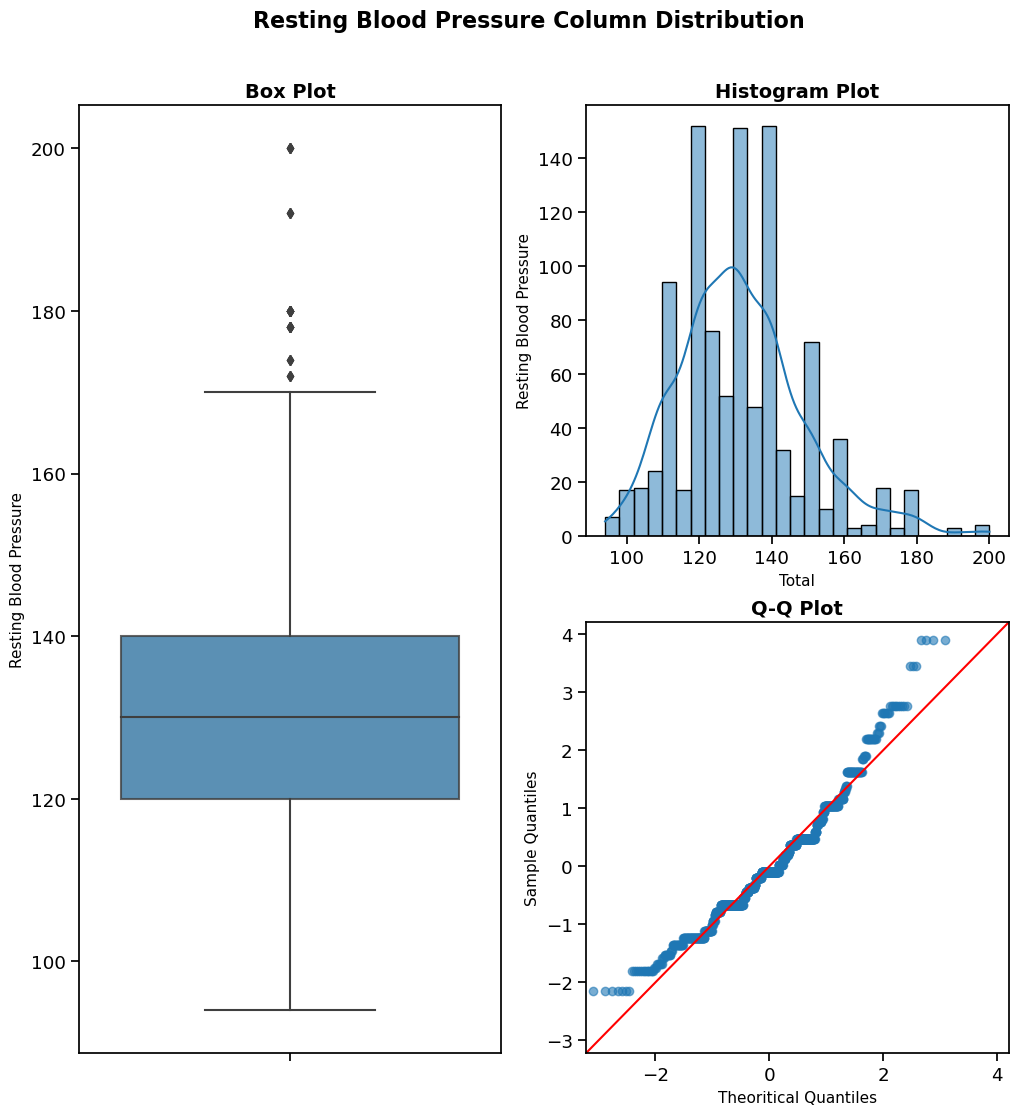

In [30]:
#  Variable & Plot Size 
var = 'trestbps'
fig=plt.figure(figsize=(12, 12))

#  Skewness & Kurtosis 
print('\033[1m'+'  Resting Blood Pressure Column Skewness & Kurtosis '+'\033[0m')
print('_' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

#  General Title 
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

#  Histogram 
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=data, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

# Q-Q Plot 
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
qqplot(data[var], fit=True, line='45', ax=ax_2,alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')

#  Box Plot 
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=data, y=var,boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11,fontfamily='sans-serif')

plt.show()

### Column Distribution on  **chol (Serum Cholestoral)**

 Serum Cholestoral Column Skewness & Kurtosis 
________________________________________________
Skewness: 1.074
Kurtosis: 3.997




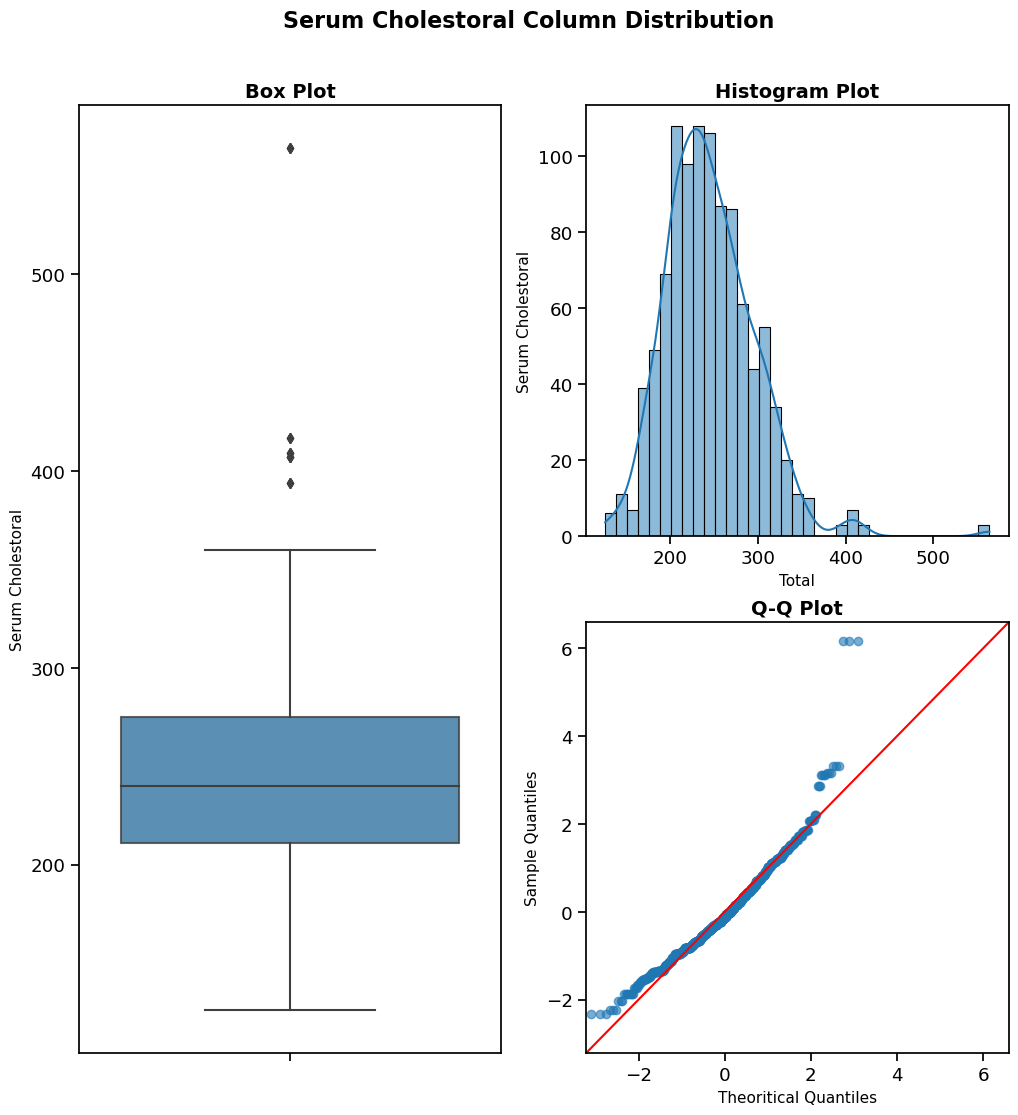

In [31]:
# Variable & Plot Size 
var = 'chol'
fig=plt.figure(figsize=(12, 12))

# Skewness & Kurtosis 
print('\033[1m'+' Serum Cholestoral Column Skewness & Kurtosis '+'\033[0m')
print('_' * 48)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# General Title 
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,fontfamily='sans-serif')
sns.histplot(data=data, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')
# Q-Q Plot
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(data[var], fit=True, line='45', ax=ax_2,alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')

#  Box Plot 
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=data, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

### Column Distribution on **thalach (Maximum Heart Rate)**

 Maximum Heart Rate Column Skewness & Kurtosis 
__________________________________________________
Skewness: -0.514
Kurtosis: -0.089




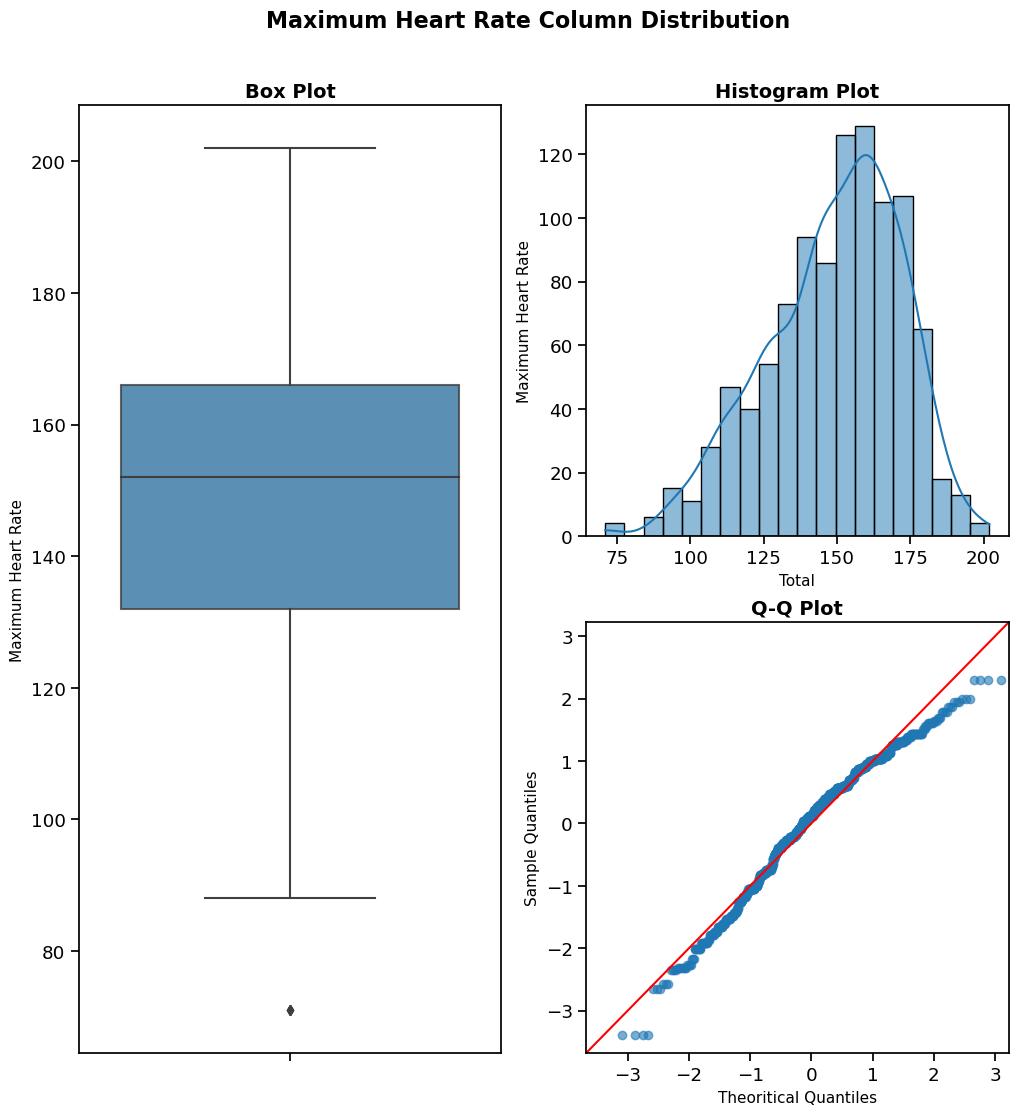

In [32]:
# Variable & Plot Size 
var = 'thalach'
fig=plt.figure(figsize=(12, 12))

# Skewness & Kurtosis 
print('\033[1m'+' Maximum Heart Rate Column Skewness & Kurtosis '+'\033[0m')
print('_' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

#  General Title 
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

#  Histogram 
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=data, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')

# Q-Q Plot
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(data[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Box Plot 
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=data, y=var,  boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

### Column Distribution on **oldpeak(ST depression induced by exercise relative to rest)**

 "oldpeak" Column Skewness & Kurtosis 
________________________________________
Skewness: 1.211
Kurtosis: 1.314




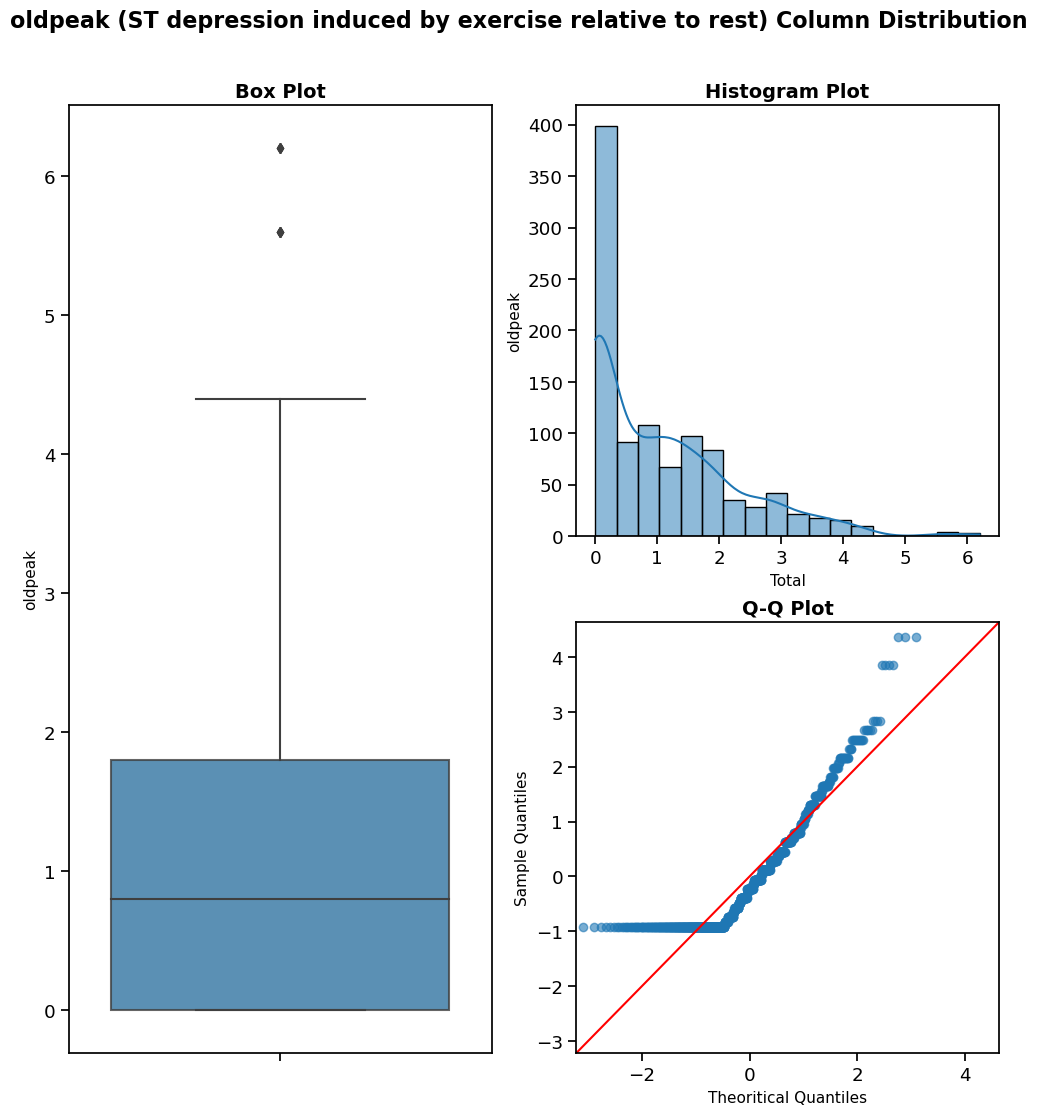

In [33]:
# Variable & Plot Size 
var = 'oldpeak'
fig=plt.figure(figsize=(12, 12))

# Skewness & Kurtosis 
print('\033[1m'+' "oldpeak" Column Skewness & Kurtosis '+'\033[0m')
print('_' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# General Title 
fig.suptitle('oldpeak (ST depression induced by exercise relative to rest) Column Distribution', fontweight='bold', fontsize=16, fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# Histogram
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.histplot(data=data, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')

#  Q-Q Plot 
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
qqplot(data[var], fit=True, line='45', ax=ax_2, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# Box Plot
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif')
sns.boxplot(data=data, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

### Column Distribution on **Heart Disease Distribution based on Major Vessels**

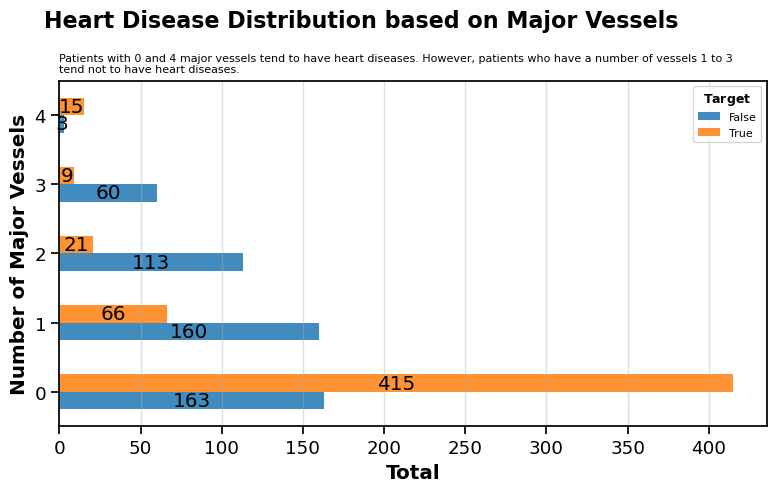

In [34]:
# Labels  
labels = ['False', 'True']

#  Creating Horizontal Bar Chart 
ax = pd.crosstab(data.ca, data.target).plot(kind='barh', figsize=(8, 5),alpha=0.85)
# Horizontal Bar Chart Settings 
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

### Heart Disease Scatter Plot based on Age against max heart rate

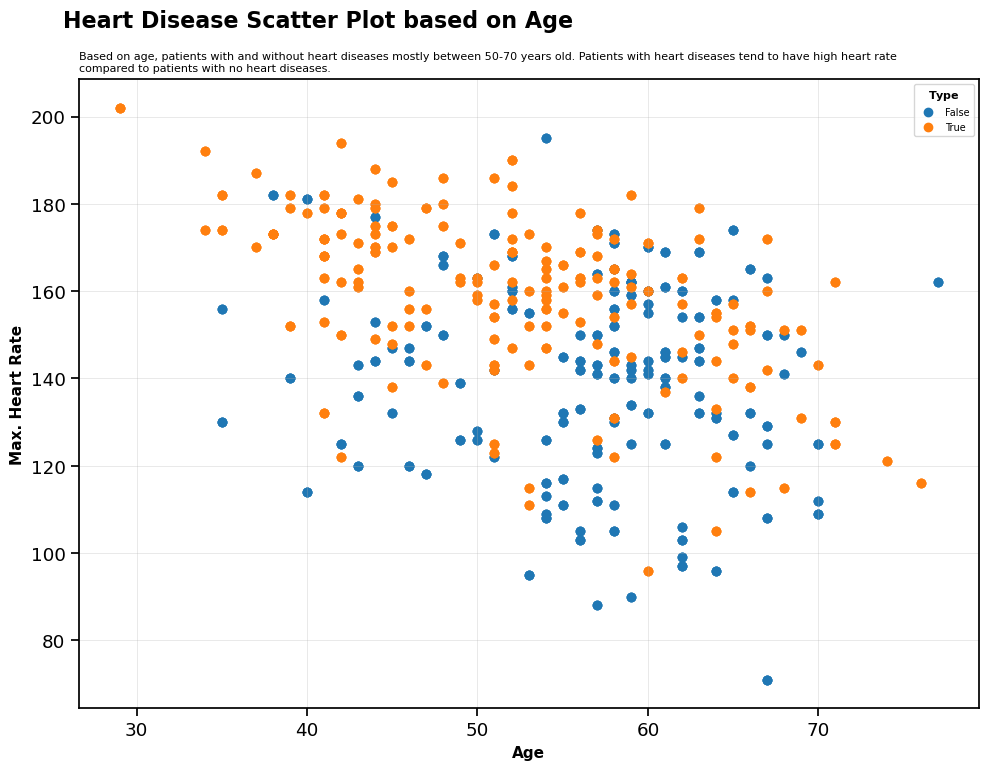

In [35]:
#  Scatter Plot Size & Titles Settings 
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# Creating Scatter Plot 
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)])

# Scatter Plot Legend & Labels Settings 
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

### Correlation Map (Heatmap)

C:\Users\chakr\AppData\Local\Temp\ipykernel_13000\1512147993.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidth =2)


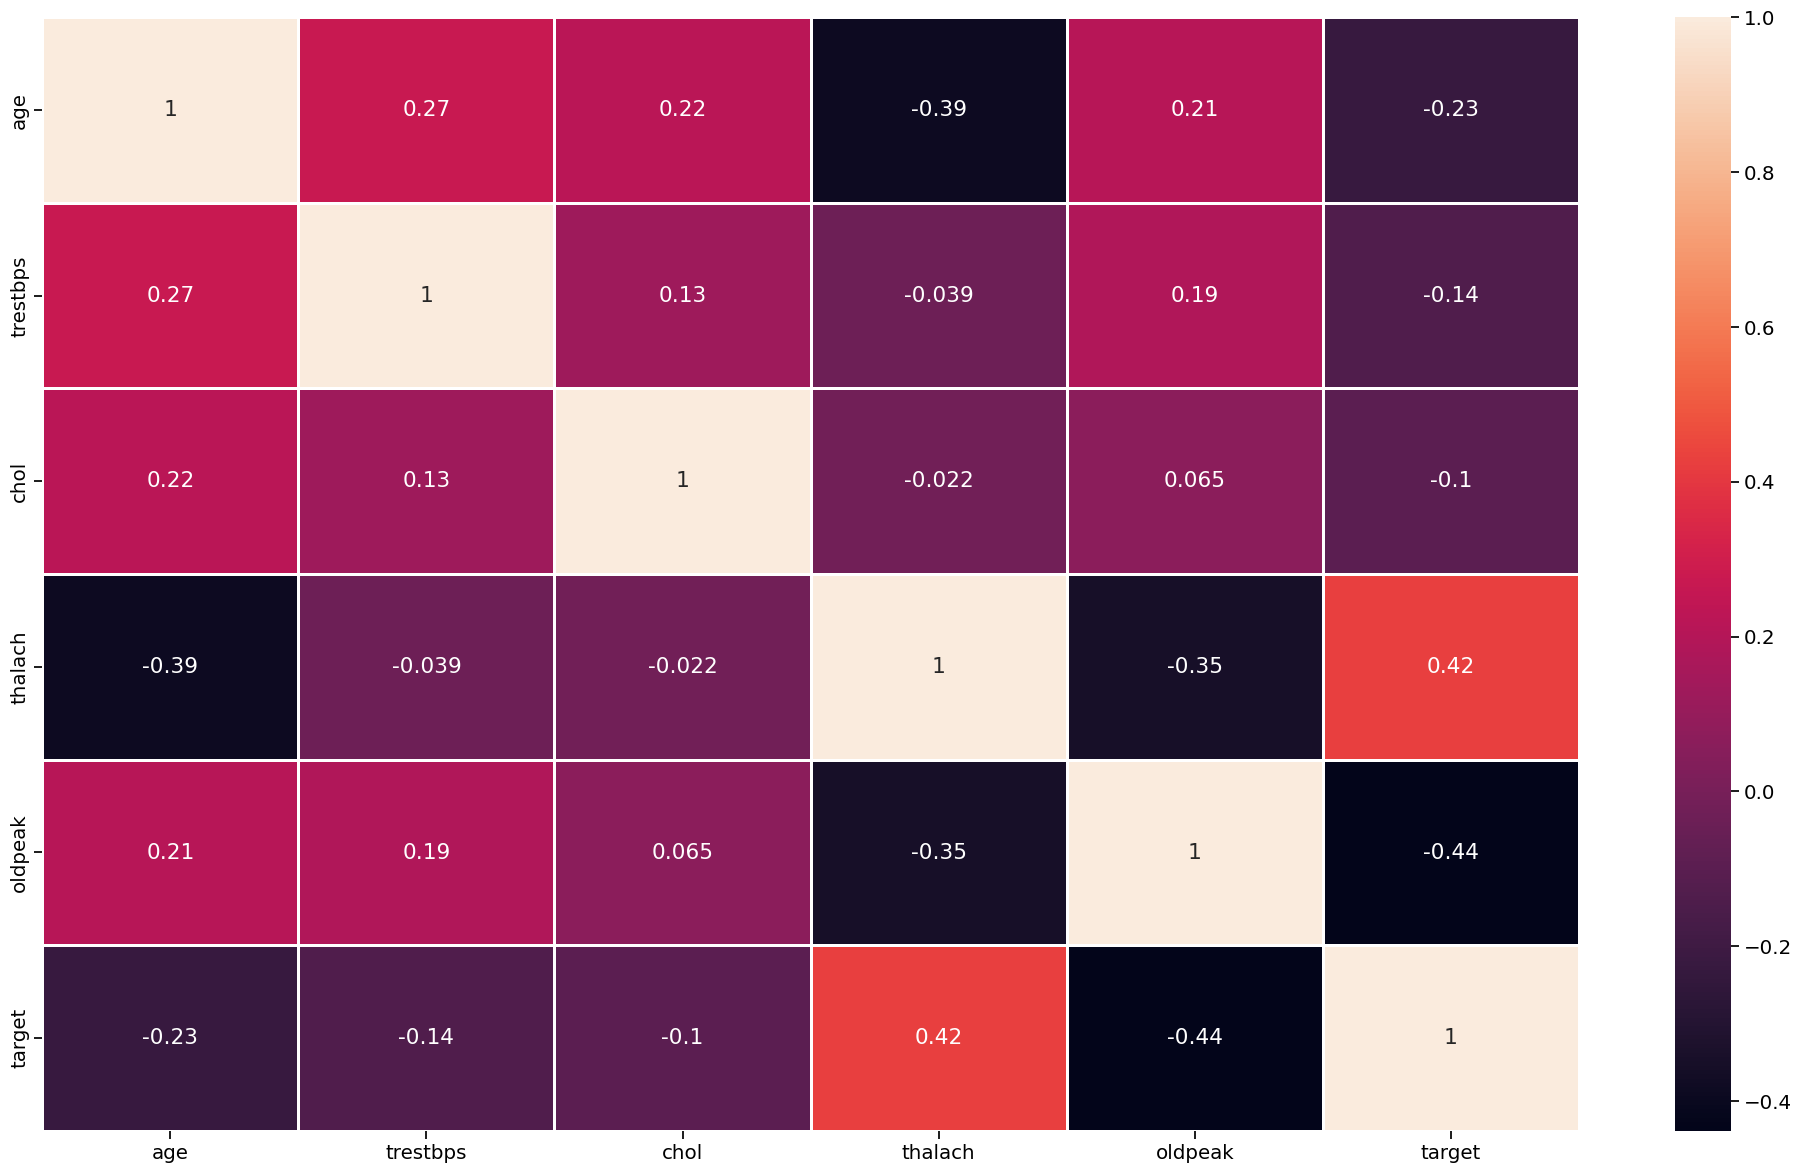

In [36]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

### Correlation of various features with the target feature

C:\Users\chakr\AppData\Local\Temp\ipykernel_13000\4166320182.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10),


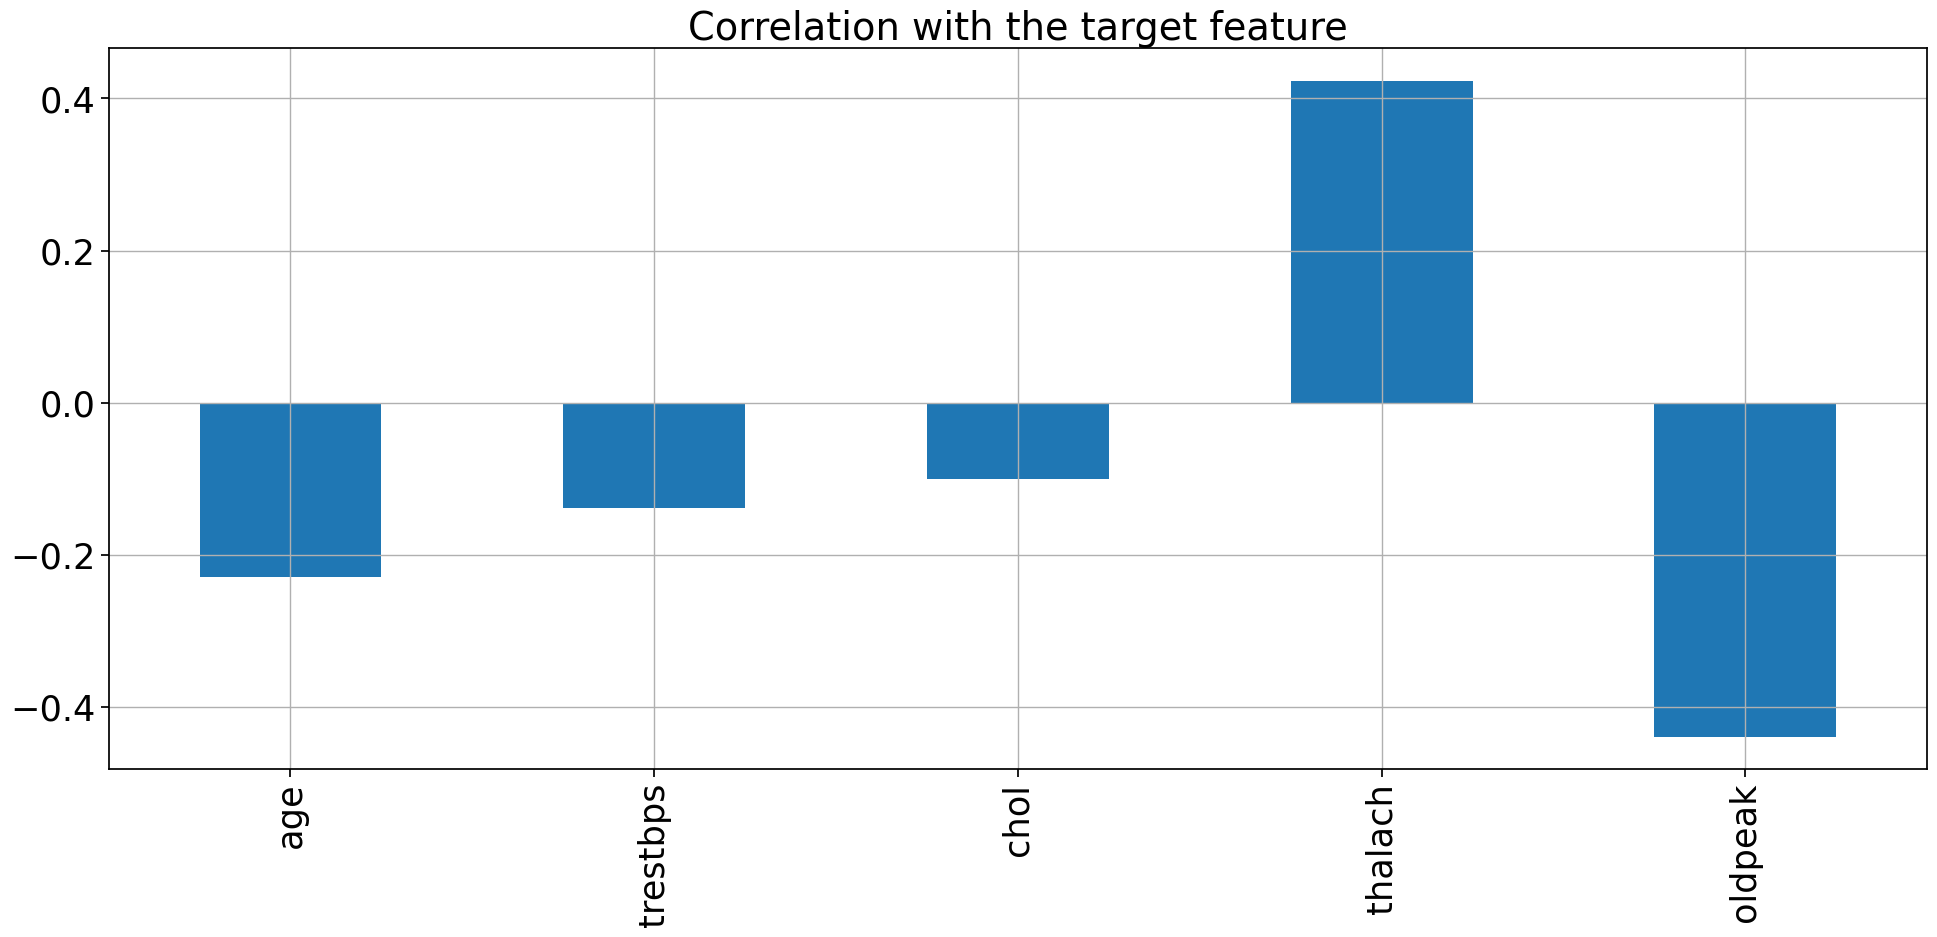

In [37]:
plt.figure(figsize=(12,12))
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                   title="Correlation with the target feature")
plt.tight_layout()

## Feature Engineering

> Now we will see the complete description of the continuous data as well as the categorical data



In [38]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("________________________________________________")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

________________________________________________
age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
________________________________________________
sex : [1 0]
________________________________________________
cp : [0 1 2 3]
________________________________________________
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
________________________________________________
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 

## Data Pre-Processing

### One Hot Encoding

In [39]:
#  Creating Dummy Variables for cp, thal and slope
cp = pd.get_dummies(data['cp'], prefix='cp')
thal = pd.get_dummies(data['thal'], prefix='thal')
slope = pd.get_dummies(data['slope'], prefix='slope')

# Merge Dummy Variables to Main Data Frame 
frames = [data, cp, thal, slope]
data = pd.concat(frames, axis = 1)

C:\Users\chakr\AppData\Local\Temp\ipykernel_13000\2778216846.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cp = pd.get_dummies(data['cp'], prefix='cp')
C:\Users\chakr\AppData\Local\Temp\ipykernel_13000\2778216846.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  thal = pd.get_dummies(data['thal'], prefix='thal')
C:\Users\chakr\AppData\Local\Temp\ipykernel_13000\2778216846.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  slope = pd.get_dummies(data['slope'], prefix='slope')


In [40]:
data.head().style.background_gradient().hide_index().set_properties(**{'font-family': 'Segoe UI'})

C:\Users\chakr\AppData\Local\Temp\ipykernel_13000\408958619.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  data.head().style.background_gradient().hide_index().set_properties(**{'font-family': 'Segoe UI'})


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0,1,0,0,0,0,0,0,1,0,0,1
53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0,1,0,0,0,0,0,0,1,1,0,0
70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0,1,0,0,0,0,0,0,1,1,0,0
61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0,1,0,0,0,0,0,0,1,0,0,1
62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0,1,0,0,0,0,0,1,0,0,1,0


### Dropping Unnecessary Variables

In [41]:
data = data.drop(columns = ['cp', 'thal', 'slope'])

In [42]:
data.head().style.background_gradient().hide_index().set_properties(**{'font-family': 'Segoe UI'})

C:\Users\chakr\AppData\Local\Temp\ipykernel_13000\408958619.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  data.head().style.background_gradient().hide_index().set_properties(**{'font-family': 'Segoe UI'})


age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
52,1,125,212,0,1,168,0,1.000000,2,0,1,0,0,0,0,0,0,1,0,0,1
53,1,140,203,1,0,155,1,3.100000,0,0,1,0,0,0,0,0,0,1,1,0,0
70,1,145,174,0,1,125,1,2.600000,0,0,1,0,0,0,0,0,0,1,1,0,0
61,1,148,203,0,1,161,0,0.000000,1,0,1,0,0,0,0,0,0,1,0,0,1
62,0,138,294,1,1,106,0,1.900000,3,0,1,0,0,0,0,0,1,0,0,1,0


### Feature Saparate

In this section, we will be seperate 'target' (dependent) column from independent columns.

In [43]:
X = data.drop(['target'], axis=1)
y = data['target']

### Data Normalization

In this section, data normalization will be performed to normalize the range of independent variables or features of data.




In [44]:
X = MinMaxScaler().fit_transform(X)

### Split Dataset

> The dataset will be splitted into 80:20 ratio (80% training and 20% testing).



In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [46]:
X_train

array([[0.5       , 1.        , 0.43396226, ..., 1.        , 0.        ,
        0.        ],
       [0.52083333, 0.        , 0.38679245, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 0.        , 0.32075472, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.33333333, 1.        , 0.1509434 , ..., 0.        , 1.        ,
        0.        ],
       [0.60416667, 1.        , 0.24528302, ..., 0.        , 1.        ,
        0.        ],
       [0.52083333, 1.        , 0.1509434 , ..., 0.        , 1.        ,
        0.        ]])

In [47]:
X_test

array([[0.45833333, 0.        , 0.43396226, ..., 0.        , 0.        ,
        1.        ],
       [0.39583333, 1.        , 0.28301887, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 1.        , 0.1509434 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.58333333, 1.        , 0.28301887, ..., 0.        , 0.        ,
        1.        ],
       [0.41666667, 1.        , 0.24528302, ..., 0.        , 1.        ,
        0.        ],
       [0.79166667, 1.        , 0.05660377, ..., 0.        , 1.        ,
        0.        ]])

In [48]:
y_train

968    0
952    1
490    1
127    1
659    1
      ..
360    1
897    1
709    0
439    0
174    0
Name: target, Length: 820, dtype: int64

In [49]:
y_test

932    1
76     1
353    1
621    0
830    1
      ..
321    1
703    1
237    0
518    0
211    0
Name: target, Length: 205, dtype: int64

## Model Implementation

### Logistic Regression



In [50]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[84 23]
 [ 8 90]]


Accuracy of Logistic Regression: 84.8780487804878 

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       107
           1       0.80      0.92      0.85        98

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



### Extreme Gradient Boost(XGBoost)

In [51]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[89 18]
 [ 6 92]]


Accuracy of Extreme Gradient Boost: 88.29268292682927 

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       107
           1       0.84      0.94      0.88        98

    accuracy                           0.88       205
   macro avg       0.89      0.89      0.88       205
weighted avg       0.89      0.88      0.88       205



### K-Nearest Neighbour (KNN)





In [52]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-Nearest Neighbour :",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[91 16]
 [15 83]]


Accuracy of K-Nearest Neighbour : 84.8780487804878 

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       107
           1       0.84      0.85      0.84        98

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



### Naive Bayes






In [53]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[83 24]
 [14 84]]


Accuracy of Naive Bayes: 81.46341463414633 

              precision    recall  f1-score   support

           0       0.86      0.78      0.81       107
           1       0.78      0.86      0.82        98

    accuracy                           0.81       205
   macro avg       0.82      0.82      0.81       205
weighted avg       0.82      0.81      0.81       205



### Random Forest



In [54]:
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[91 16]
 [ 3 95]]


Accuracy of Random Forest: 90.73170731707317 

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       107
           1       0.86      0.97      0.91        98

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



### Decision Tree Classifier

In [55]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree Classifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[93 14]
 [ 2 96]]


Accuracy of Decision Tree Classifier: 92.19512195121952 

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       107
           1       0.87      0.98      0.92        98

    accuracy                           0.92       205
   macro avg       0.93      0.92      0.92       205
weighted avg       0.93      0.92      0.92       205



### Support Vector Classifier

In [56]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[91 16]
 [ 9 89]]


Accuracy of Support Vector Classifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       107
           1       0.85      0.91      0.88        98

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



### Reciver Operating Characterstic Curve

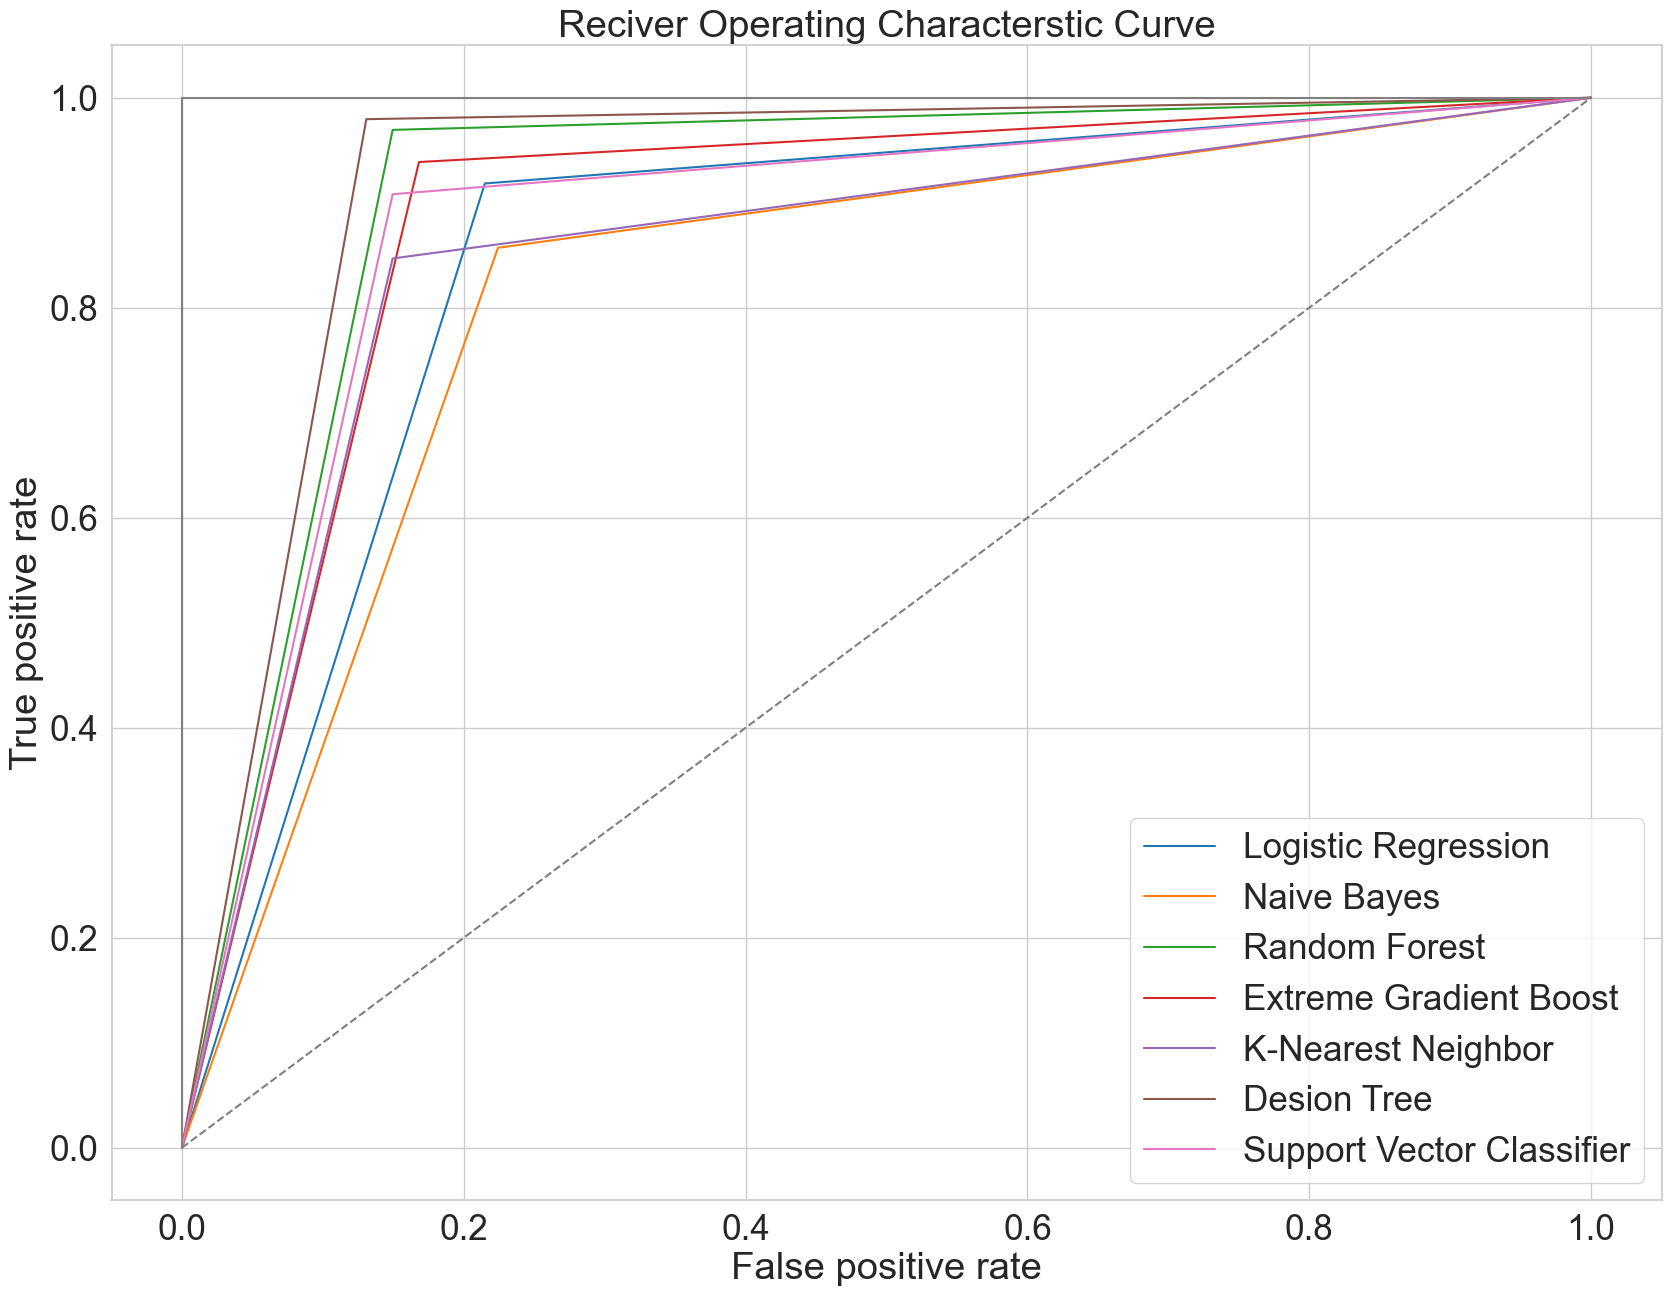

In [57]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## Model Comparison

In [58]:
model_compare = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_compare

,Model,Accuracy
0,Logistic Regression,84.878049
1,Naive Bayes,81.463415
2,Random Forest,90.731707
3,Extreme Gradient Boost,88.292683
4,K-Nearest Neighbour,84.878049
5,Decision Tree,92.195122
6,Support Vector Machine,87.804878


### Represent Accuracy of different models

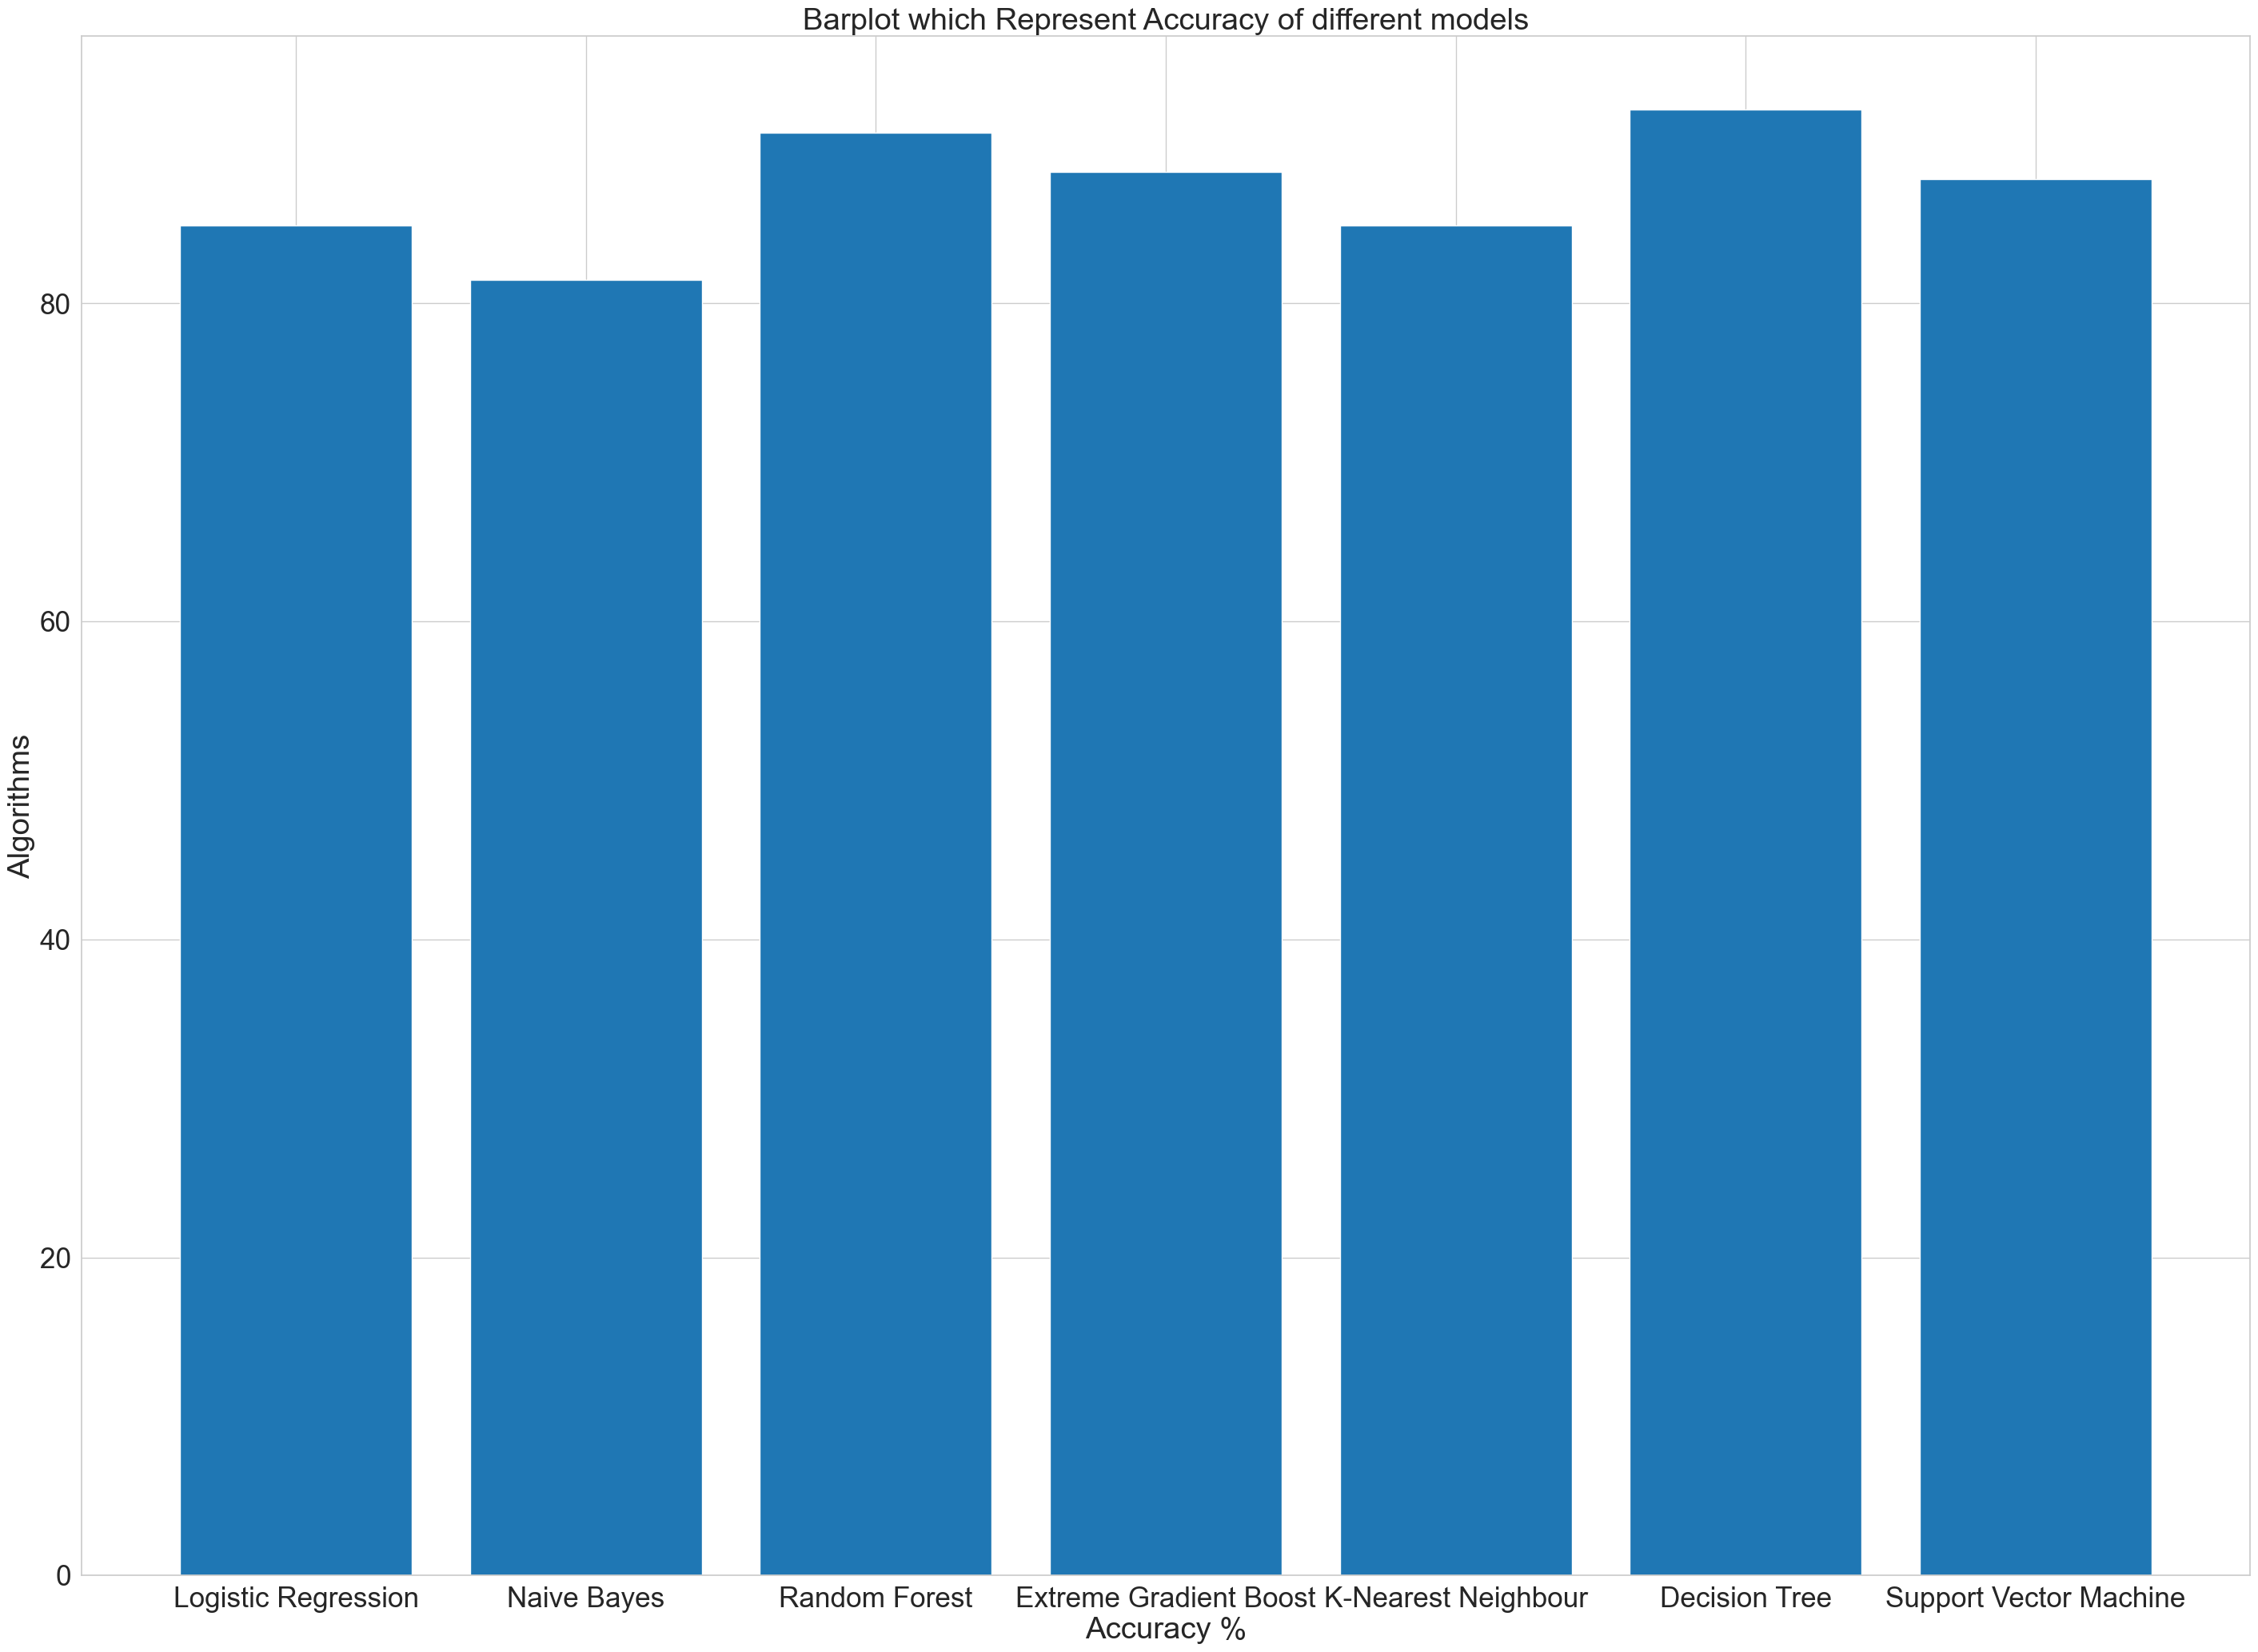

In [59]:
plt.figure(figsize=(35,25))
plt.title("Barplot which Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_compare['Model'],model_compare['Accuracy'])
plt.show()

## Ensembling

> In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

**About Stacking**

> Stacking or Stacked Generalization is an ensemble machine learning algorithm. It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms. The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.The stacking ensemble is illustrated in the figure below




In [60]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[92 15]
 [10 88]]


Accuracy of StackingCVClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       107
           1       0.85      0.90      0.88        98

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



### Confusion matrix

> It gives the value of true positive and false negative which will help to predict how much our model is optimized to predict it.

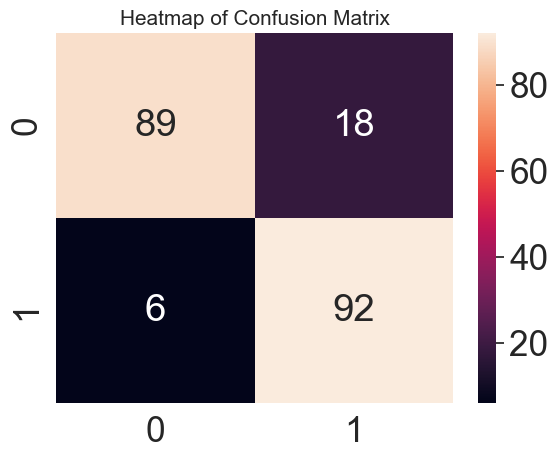

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,xgb_predicted)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

## Conclusion

Among the classifiers we can see that KNN had an accuracy of 84.88%, logistic regression had an accuracy of 84.88%, and random forest classifier had an accuracy rate of 90.73%. Further evaluation of the model entails generating the confusion matrix to understand the pattern of classification. In the case of logistic regression, 87,745 out of 95,939 samples were correctly classified whereas it is 86,863 for KNN, and 86,873 for the random forest classifier. Though all the algorithms performed to the tune of the accuracy of more than 90%, logistic regression was the most accurate one.

**Key takeaways on Heart Disease Prediction**

KNN, logistic regression and random forest classifiers are capable of segregating individuals into high and low-risk categories with a high accuracy rate.
A confusion matrix is a key tool to understand the misclassification aspect of the model.
High blood pressure, high cholesterol, smoking, diabetic status, and physical activity are important factors that cause heart disease.
Machine learning enables the detection of patterns from the data for the prediction of the patient’s condition.

In [64]:
import pickle

# Create a Python object to save as a pickle file
heart= {'key': 'value'}

# Open a new file in binary mode to save the pickle data
with open('heart.pkl', 'wb') as f:
    # Use the pickle.dump() function to save the object to the file
    pickle.dump(heart, f)